# Lead Scoring Case Study (Upgrad Assignment Machine Learning)


Problem Statement
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. A typical lead conversion process can be represented using the following funnel:

Lead Conversion Process - Demonstrated as a funnel
Lead Conversion Process - Demonstrated as a funnel
As you can see, there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

 

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

#### resolving steps:

* **Steps will be as follows:**
    * Importing the data
    * Data Cleaning
    * EDA
    * Model Building
    * Model Evaluation
    * Summary


In [1]:
# Importing Libraries 

import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')


import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.metrics import precision_score, recall_score, precision_recall_curve
from sklearn import metrics
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
#set the screen 

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

pd.set_option('display.width',200)
pd.set_option('display.html.border',1)

pd.set_option('display.max_columns',200)
pd.set_option('display.max_colwidth',255)
pd.set_option('display.max_info_columns',200)
pd.set_option('display.max_info_rows',200)

## Importing the data

In [3]:
x_edu_df = pd.read_csv("Leads.csv")
x_edu_df.head(4)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified


In [4]:
#lets check the shape of the data
x_edu_df.shape

(9240, 37)

In [5]:
#describe the data
x_edu_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
#type of the data
x_edu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Dtype  
---  ------                                         -----  
 0   Prospect ID                                    object 
 1   Lead Number                                    int64  
 2   Lead Origin                                    object 
 3   Lead Source                                    object 
 4   Do Not Email                                   object 
 5   Do Not Call                                    object 
 6   Converted                                      int64  
 7   TotalVisits                                    float64
 8   Total Time Spent on Website                    int64  
 9   Page Views Per Visit                           float64
 10  Last Activity                                  object 
 11  Country                                        object 
 12  Specialization                                 o

In [7]:
#convert int to float TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit'
x_edu_df['TotalVisits'] = x_edu_df['TotalVisits'].astype(float)
x_edu_df['Total Time Spent on Website'] = x_edu_df['Total Time Spent on Website'].astype(float)
x_edu_df['Page Views Per Visit'] = x_edu_df['Page Views Per Visit'].astype(float)

In [8]:
#fill the blank value with mean 
x_edu_df['TotalVisits'].fillna(x_edu_df['TotalVisits'].mean(), inplace=True)
x_edu_df['Total Time Spent on Website'].fillna(x_edu_df['Total Time Spent on Website'].mean(), inplace=True)
x_edu_df['Page Views Per Visit'].fillna(x_edu_df['Page Views Per Visit'].mean(), inplace=True)

#check the null value
x_edu_df.isnull().sum()


Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                         0
Total Time Spent on Website                         0
Page Views Per Visit                                0
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [9]:
#lets check null values percentage
round(100*(x_edu_df.isnull().sum()/len(x_edu_df.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       0.00
Total Time Spent on Website                       0.00
Page Views Per Visit                              0.00
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [10]:
#data cleaning replace Select  values with null values
x_edu_df = x_edu_df.replace('Select', np.nan)


In [11]:
#data columns
x_edu_df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education', 'What is your current occupation', 'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content', 'Lead Profile', 'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

#### Lets divide data into categorical and numerical and target columns and perform EDA

In [12]:
#select all categorical columns
cat_cols = x_edu_df.select_dtypes(include=['object']).columns
cat_cols

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity', 'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation', 'What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement',
       'Through Recommendations', 'Receive More Updates About Our Courses', 'Tags', 'Lead Quality', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'Lead Profile', 'City',
       'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [13]:
#describe categorical columns
x_edu_df[cat_cols].describe()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
count,9240,9240,9204,9240,9240,9137,6779,5860,1990,6550,6531,9240,9240,9240,9240,9240,9240,9240,9240,5887,4473,9240,9240,2385,5571,5022,5022,9240,9240,9240
unique,9240,5,21,2,2,17,38,18,9,6,3,2,1,2,2,2,2,2,1,26,5,1,1,5,6,3,3,1,2,16
top,7927b2df-8bba-4d29-b9a2-b6e0beafe620,Landing Page Submission,Google,No,No,Email Opened,India,Finance Management,Online Search,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,02.Medium,No,No,Modified
freq,1,4886,2868,8506,9238,3437,6492,976,808,5600,6528,9226,9240,9238,9239,9239,9236,9233,9240,2072,1560,9240,9240,1613,3222,3839,2788,9240,6352,3407


In [14]:
#divide top freq value of cat columns with total rows
for col in cat_cols:
    print(col,":",round(x_edu_df[col].value_counts(normalize=True,dropna=False)[0]*100,2),"%")

Prospect ID : 0.01 %
Lead Origin : 52.88 %
Lead Source : 31.04 %
Do Not Email : 92.06 %
Do Not Call : 99.98 %
Last Activity : 37.2 %
Country : 70.26 %
Specialization : 36.58 %
How did you hear about X Education : 78.46 %
What is your current occupation : 60.61 %
What matters most to you in choosing a course : 70.65 %
Search : 99.85 %
Magazine : 100.0 %
Newspaper Article : 99.98 %
X Education Forums : 99.99 %
Newspaper : 99.99 %
Digital Advertisement : 99.96 %
Through Recommendations : 99.92 %
Receive More Updates About Our Courses : 100.0 %
Tags : 36.29 %
Lead Quality : 51.59 %
Update me on Supply Chain Content : 100.0 %
Get updates on DM Content : 100.0 %
Lead Profile : 74.19 %
City : 39.71 %
Asymmetrique Activity Index : 45.65 %
Asymmetrique Profile Index : 45.65 %
I agree to pay the amount through cheque : 100.0 %
A free copy of Mastering The Interview : 68.74 %
Last Notable Activity : 36.87 %


In [15]:
target_column = {'Converted'}
#make two catalogues for categorical columns drop_col and selected_col

#add drop_col with 95% top freq value
drop_col={}
for col in cat_cols:
    if round(x_edu_df[col].value_counts(normalize=True,dropna=False)[0]*100,2) > 95:
        drop_col[col]=round(x_edu_df[col].value_counts(normalize=True,dropna=False)[0]*100,2)
#add selected_col with other columns
selected_col={}
for col in cat_cols:
    if round(x_edu_df[col].value_counts(normalize=True,dropna=False)[0]*100,2) < 95:
        selected_col[col]=round(x_edu_df[col].value_counts(normalize=True,dropna=False)[0]*100,2)
#print drop_col and selected_col
print(f"drop_col: {drop_col.keys()}")
print("*******************")
print(f"selected_col: {selected_col.keys()}")



drop_col: dict_keys(['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque'])
*******************
selected_col: dict_keys(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity', 'Country', 'Specialization', 'How did you hear about X Education', 'What is your current occupation', 'What matters most to you in choosing a course', 'Tags', 'Lead Quality', 'Lead Profile', 'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'A free copy of Mastering The Interview', 'Last Notable Activity'])


In [16]:
#lets check null values percentage in categorical columns
round(100*(x_edu_df[cat_cols].isnull().sum()/len(x_edu_df.index)), 2)

Prospect ID                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Recommendations                           0.00
Receive Mo

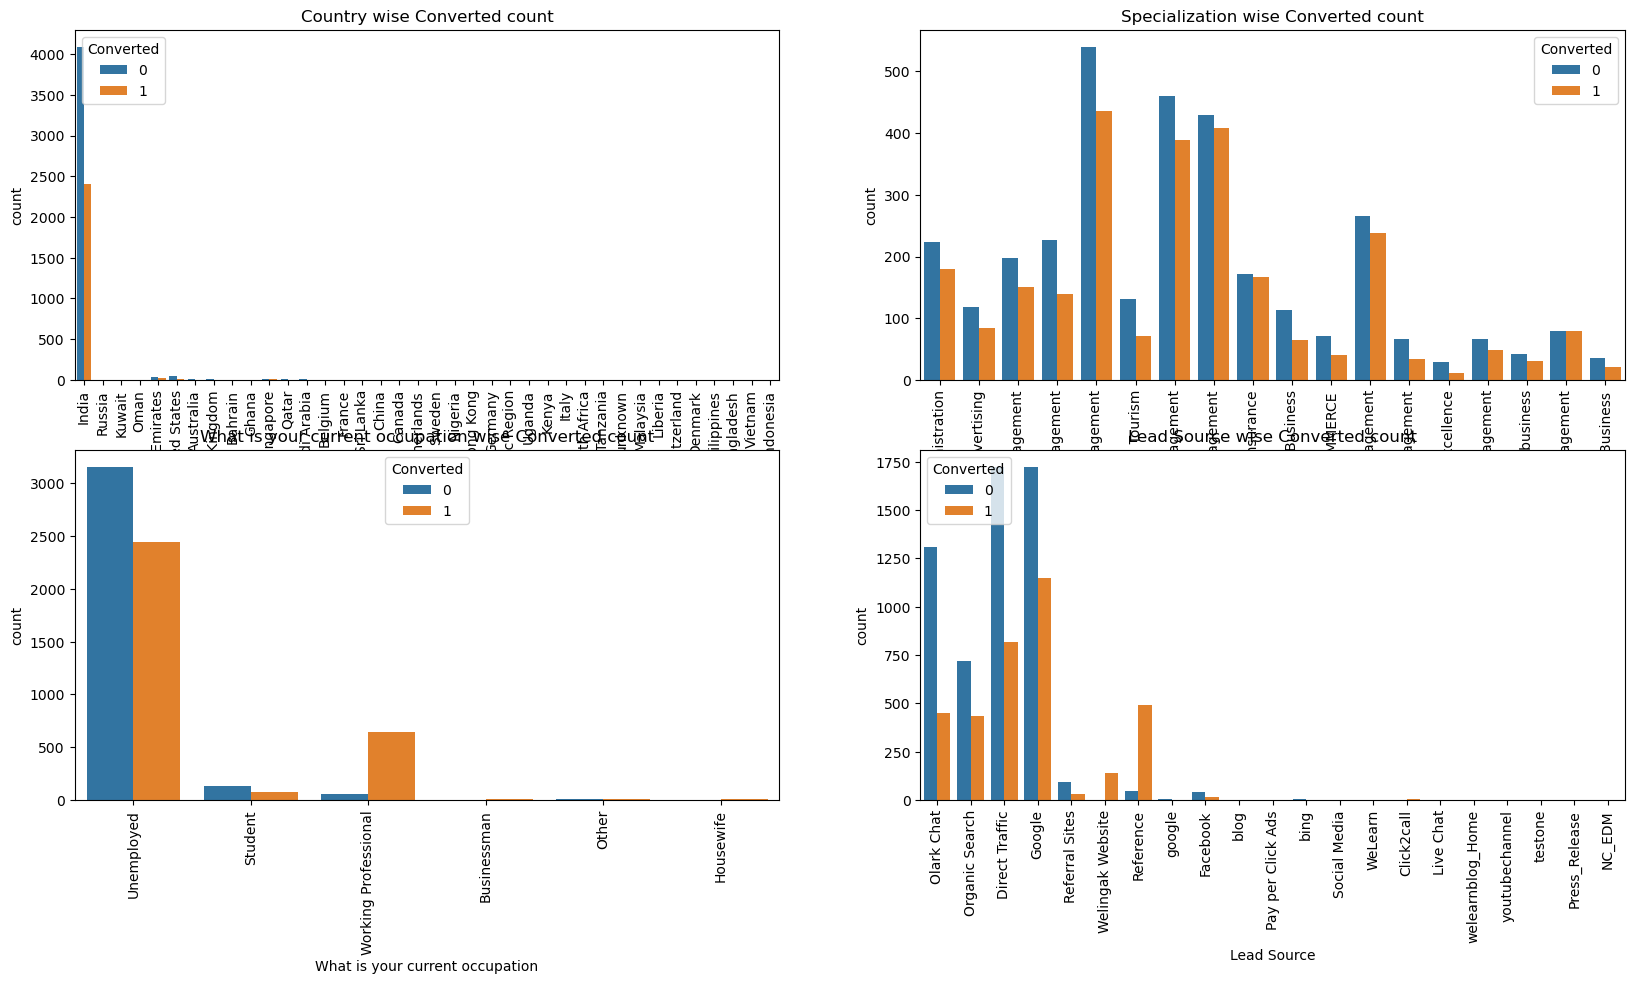

In [17]:
#lets get some insight from the selected columns
#check country wise total count
#make multiple subplots two in row
fig, ax = plt.subplots(2,2,figsize=(20,10))

#make count stacked bar plot for country and Converted count 
sns.countplot(x='Country', hue='Converted', data=x_edu_df, ax=ax[0,0])
ax[0,0].set_title('Country wise Converted count')
#rotate x axis label
for tick in ax[0,0].get_xticklabels():
    tick.set_rotation(90)
#second subplot
#make count stacked bar plot for Specialization and Converted count
sns.countplot(x='Specialization', hue='Converted', data=x_edu_df, ax=ax[0,1])
ax[0,1].set_title('Specialization wise Converted count')
#rotate x axis label
for tick in ax[0,1].get_xticklabels():
    tick.set_rotation(90)
#third subplot
#make count stacked bar plot for What is your current occupation and Converted count
sns.countplot(x='What is your current occupation', hue='Converted', data=x_edu_df, ax=ax[1,0])
ax[1,0].set_title('What is your current occupation wise Converted count')
#rotate x axis label
for tick in ax[1,0].get_xticklabels():
    tick.set_rotation(90)
#fourth subplot
#make count stacked bar plot for Lead Source and Converted count
sns.countplot(x='Lead Source', hue='Converted', data=x_edu_df, ax=ax[1,1])
ax[1,1].set_title('Lead Source wise Converted count')
#rotate x axis label
for tick in ax[1,1].get_xticklabels():
    tick.set_rotation(90)




In [18]:
#lets finilize the list of required cat columns
cat_cols={'Last Notable Activity', 'A free copy of Mastering The Interview', 'Do Not Email', 'Lead Source', 'Last Activity', 'Lead Origin'}
drop_col={'Get updates on DM Content', 'Lead Number', 'I agree to pay the amount through cheque', 'Do Not Call', 'Receive More Updates About Our Courses', 'Magazine', 'Newspaper Article', 
'Prospect ID', 'Newspaper', 'Update me on Supply Chain Content', 'Through Recommendations', 'Search', 'Digital Advertisement', 'X Education Forums'}
#list of numerical columns
numerical_column = {'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit'}

In [19]:
#final data frame

x_edu_df=x_edu_df[list(numerical_column|cat_cols|target_column)]

print(x_edu_df.head(2))
#print null value
print(x_edu_df.isnull().sum())


  Do Not Email A free copy of Mastering The Interview     Lead Source  Total Time Spent on Website  Page Views Per Visit  Converted Lead Origin            Last Activity  TotalVisits  \
0           No                                     No      Olark Chat                          0.0                   0.0          0         API  Page Visited on Website          0.0   
1           No                                     No  Organic Search                        674.0                   2.5          0         API             Email Opened          5.0   

  Last Notable Activity  
0              Modified  
1          Email Opened  
Do Not Email                                0
A free copy of Mastering The Interview      0
Lead Source                                36
Total Time Spent on Website                 0
Page Views Per Visit                        0
Converted                                   0
Lead Origin                                 0
Last Activity                             10

In [20]:
#lets check null values percentage in final data frame
round(100*(x_edu_df.isnull().sum()/len(x_edu_df.index)), 2)

Do Not Email                              0.00
A free copy of Mastering The Interview    0.00
Lead Source                               0.39
Total Time Spent on Website               0.00
Page Views Per Visit                      0.00
Converted                                 0.00
Lead Origin                               0.00
Last Activity                             1.11
TotalVisits                               0.00
Last Notable Activity                     0.00
dtype: float64

In [21]:
#handling null values
#cat columns
for col in cat_cols:
    x_edu_df[col].fillna(x_edu_df[col].mode()[0], inplace=True)
#numerical columns
for col in numerical_column:
    x_edu_df[col].fillna(x_edu_df[col].mean(), inplace=True)

#lets check null values percentage in final data frame
round(100*(x_edu_df.isnull().sum()/len(x_edu_df.index)), 2)



Do Not Email                              0.0
A free copy of Mastering The Interview    0.0
Lead Source                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Converted                                 0.0
Lead Origin                               0.0
Last Activity                             0.0
TotalVisits                               0.0
Last Notable Activity                     0.0
dtype: float64

## Exploratory Data Analysis

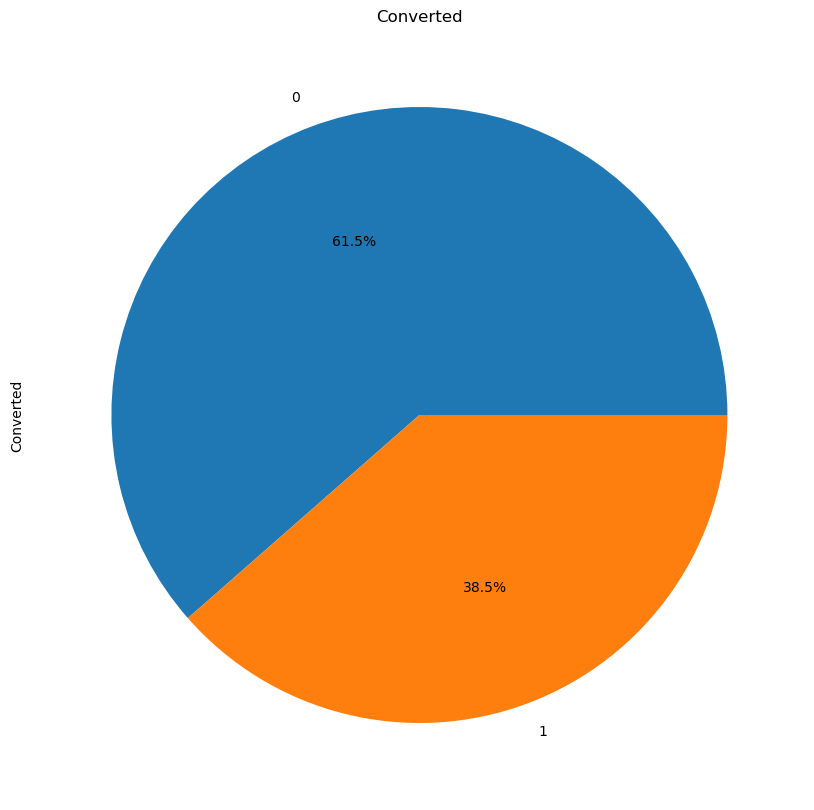

In [22]:
#make pie chart for Converted
plt.figure(figsize=(10,10))
x_edu_df['Converted'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Converted')
#dark blank font color
plt.rcParams.update({'font.size': 15, 'font.weight': 'bold', 'text.color': 'black', 'axes.labelcolor': 'black', 'xtick.color': 'black', 'ytick.color': 'black'})

plt.show()


In [23]:
# function for integer columns box plot and histogram and scatter plot
def plot_box_hist(df, col):
    fig, ax = plt.subplots(1, 3, figsize=(13, 5))
    sns.boxplot(df[col], ax=ax[0])
    sns.distplot(df[col], ax=ax[1])
    sns.scatterplot(x=col, y='Converted', data=df, ax=ax[2])
    plt.show()

In [24]:
# function for categorical columns count plot
def plot_count(df, col):
    plt.figure(figsize=(25, 5))
    sns.countplot(df[col])
    #white background
    plt.style.use('seaborn-whitegrid')
    plt.xticks(rotation=90)
    plt.show()
    

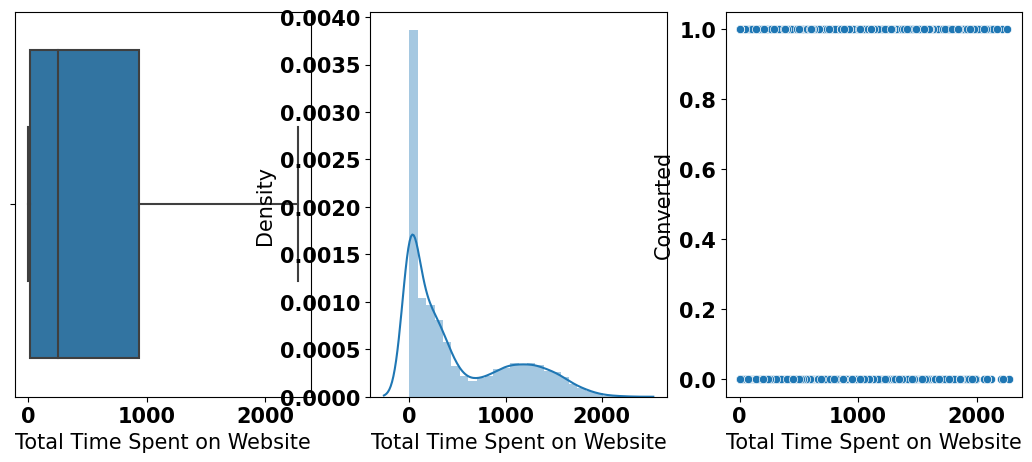

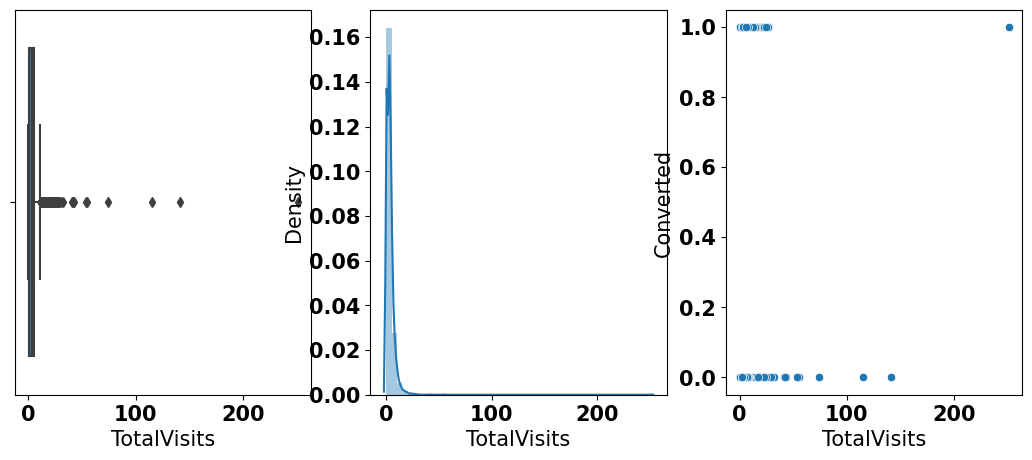

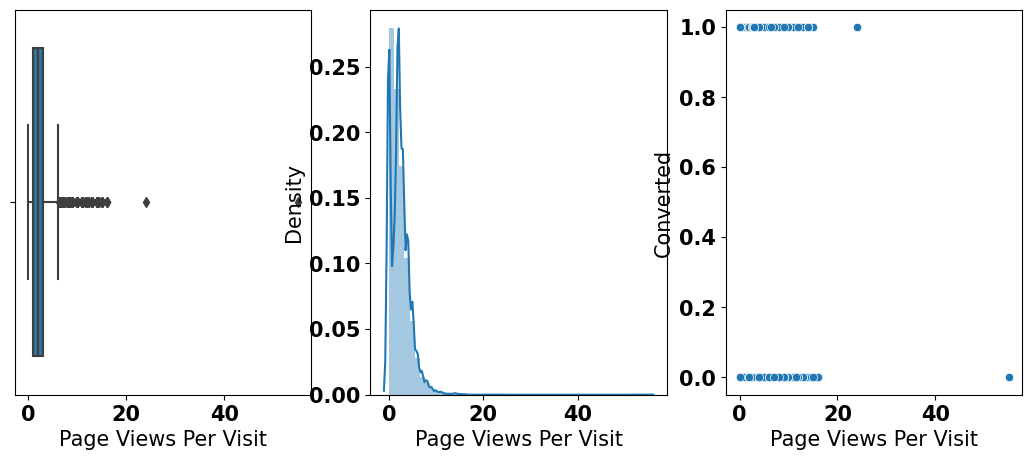

In [25]:
#plot the box plot and histogram for numerical columns
for col in numerical_column:
    plot_box_hist(x_edu_df, col)

    

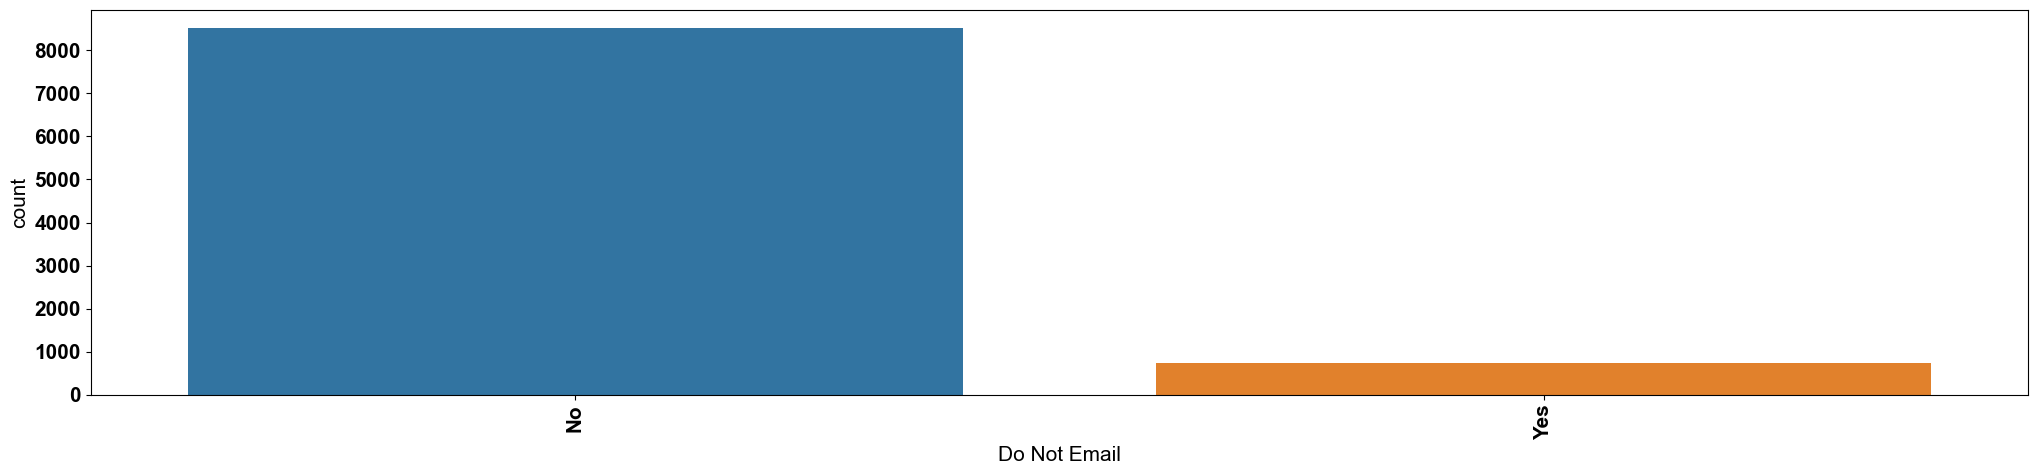

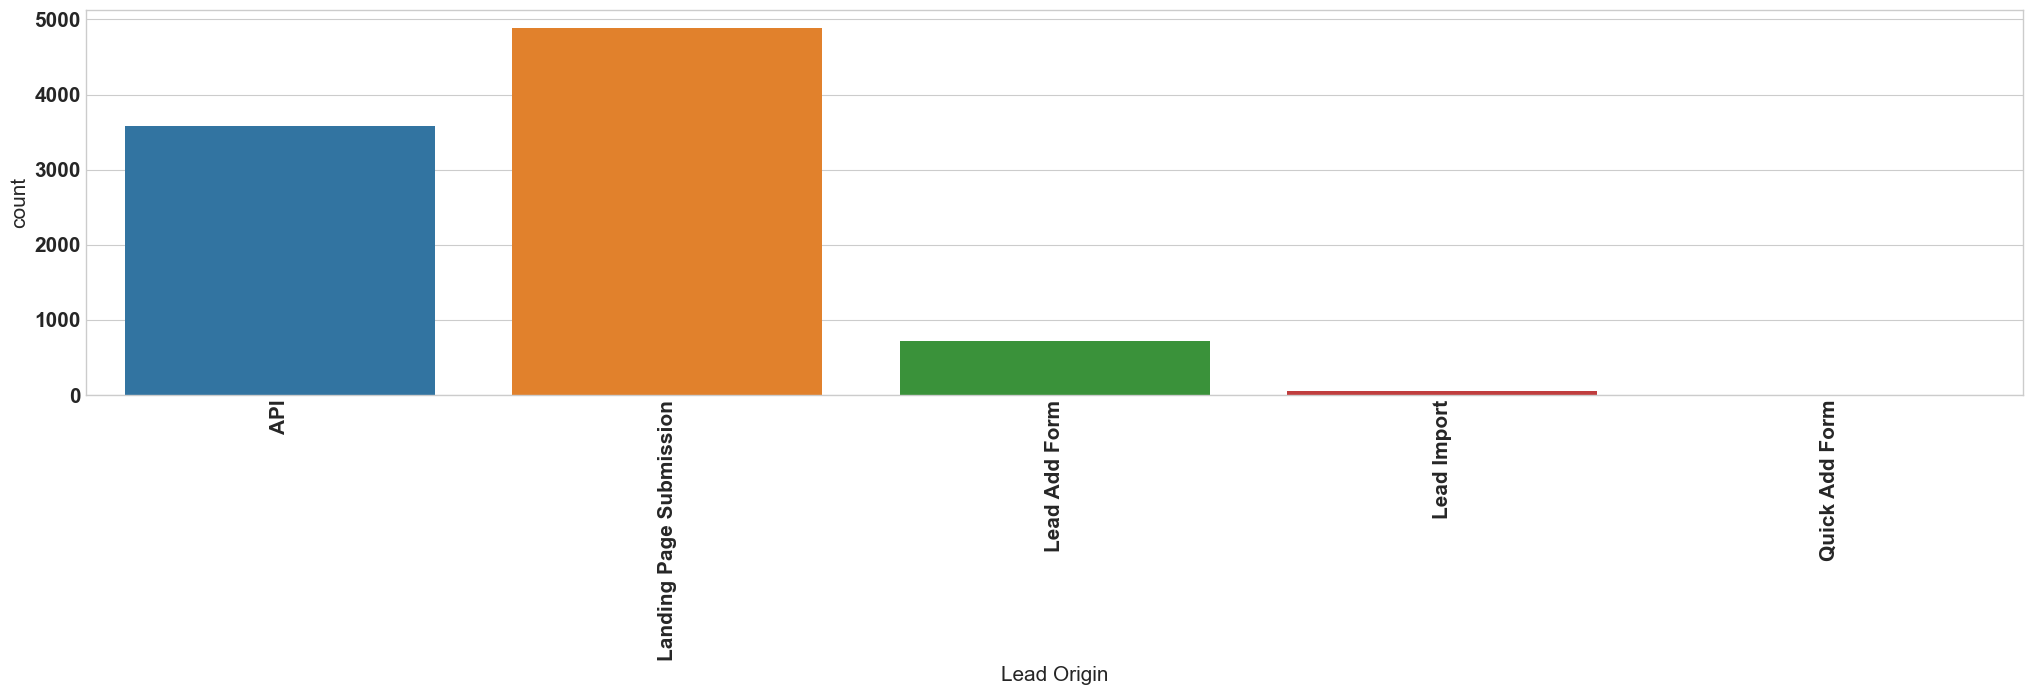

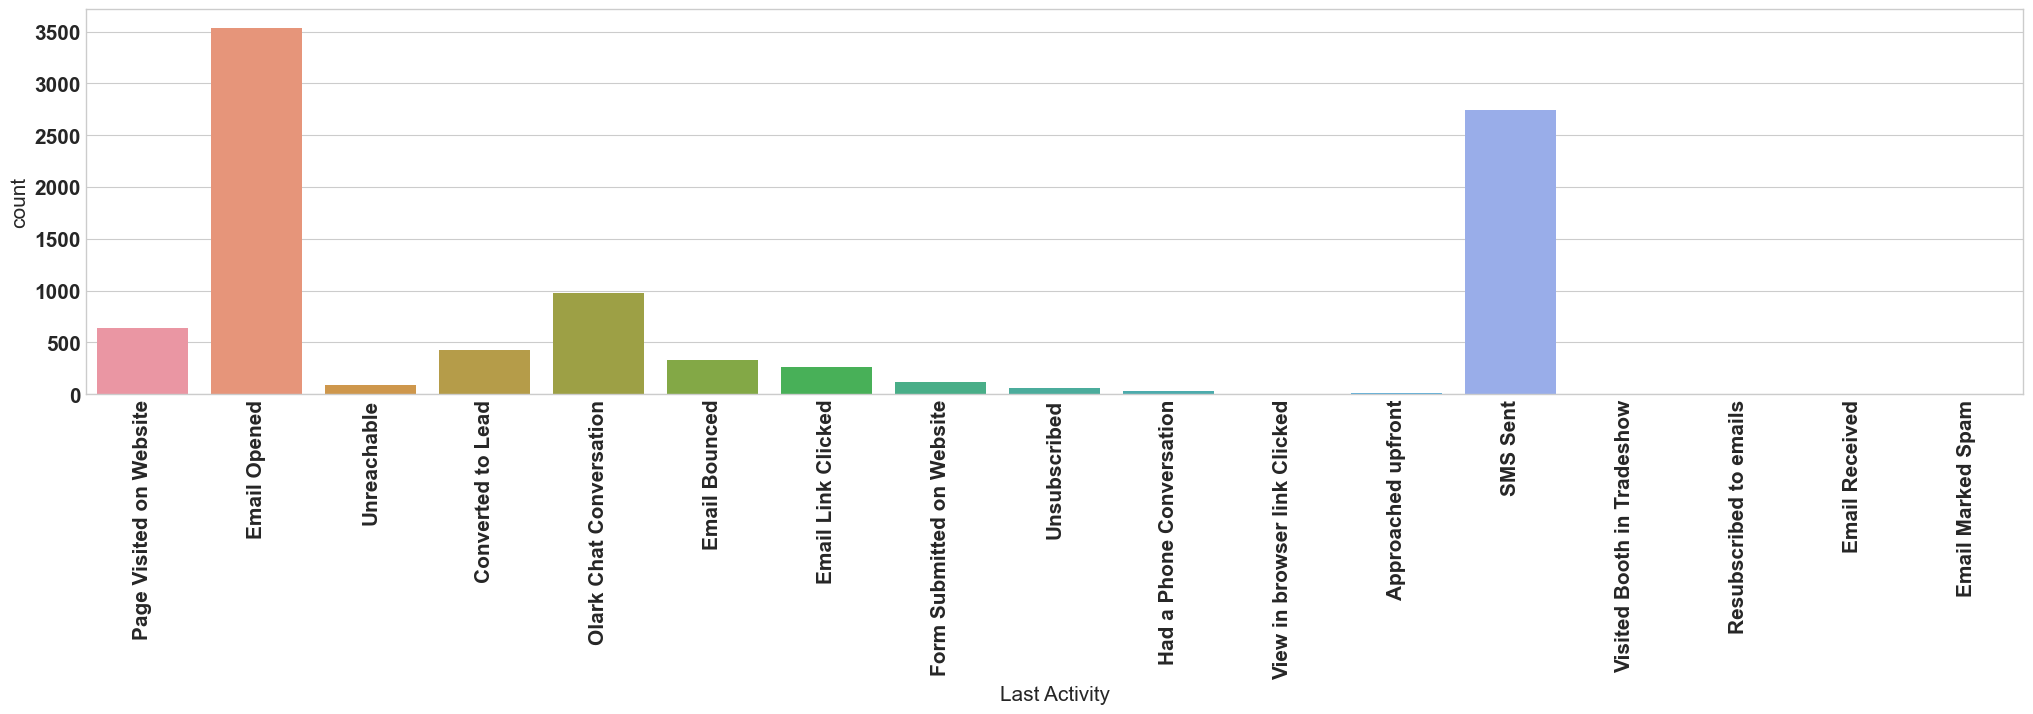

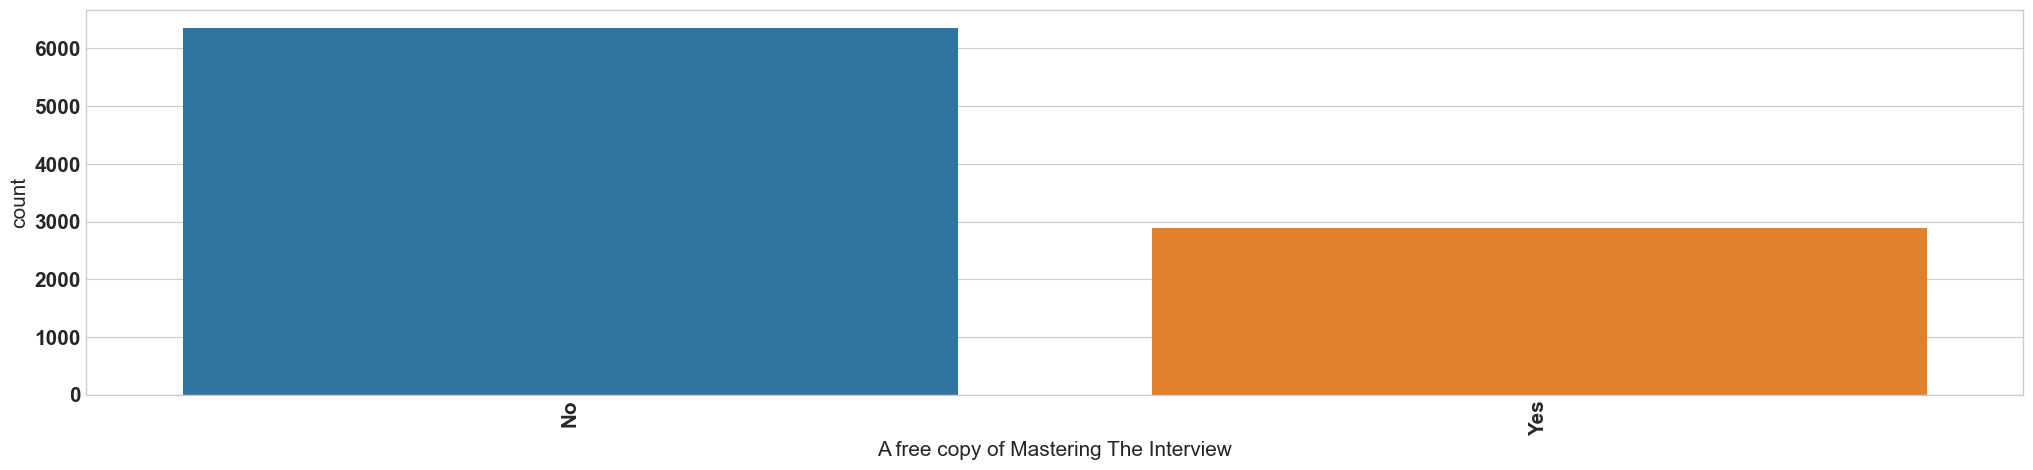

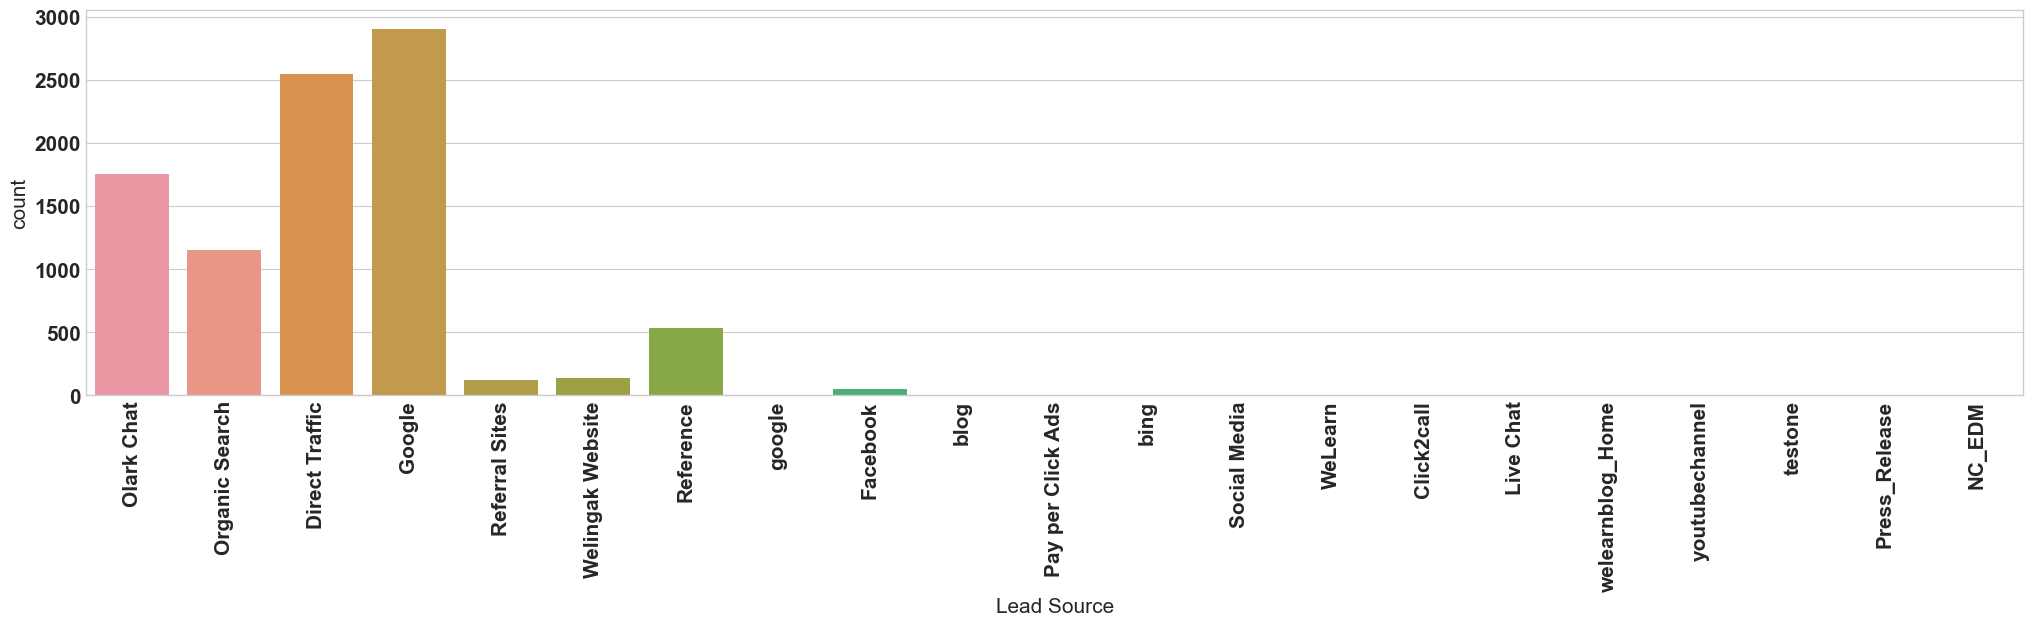

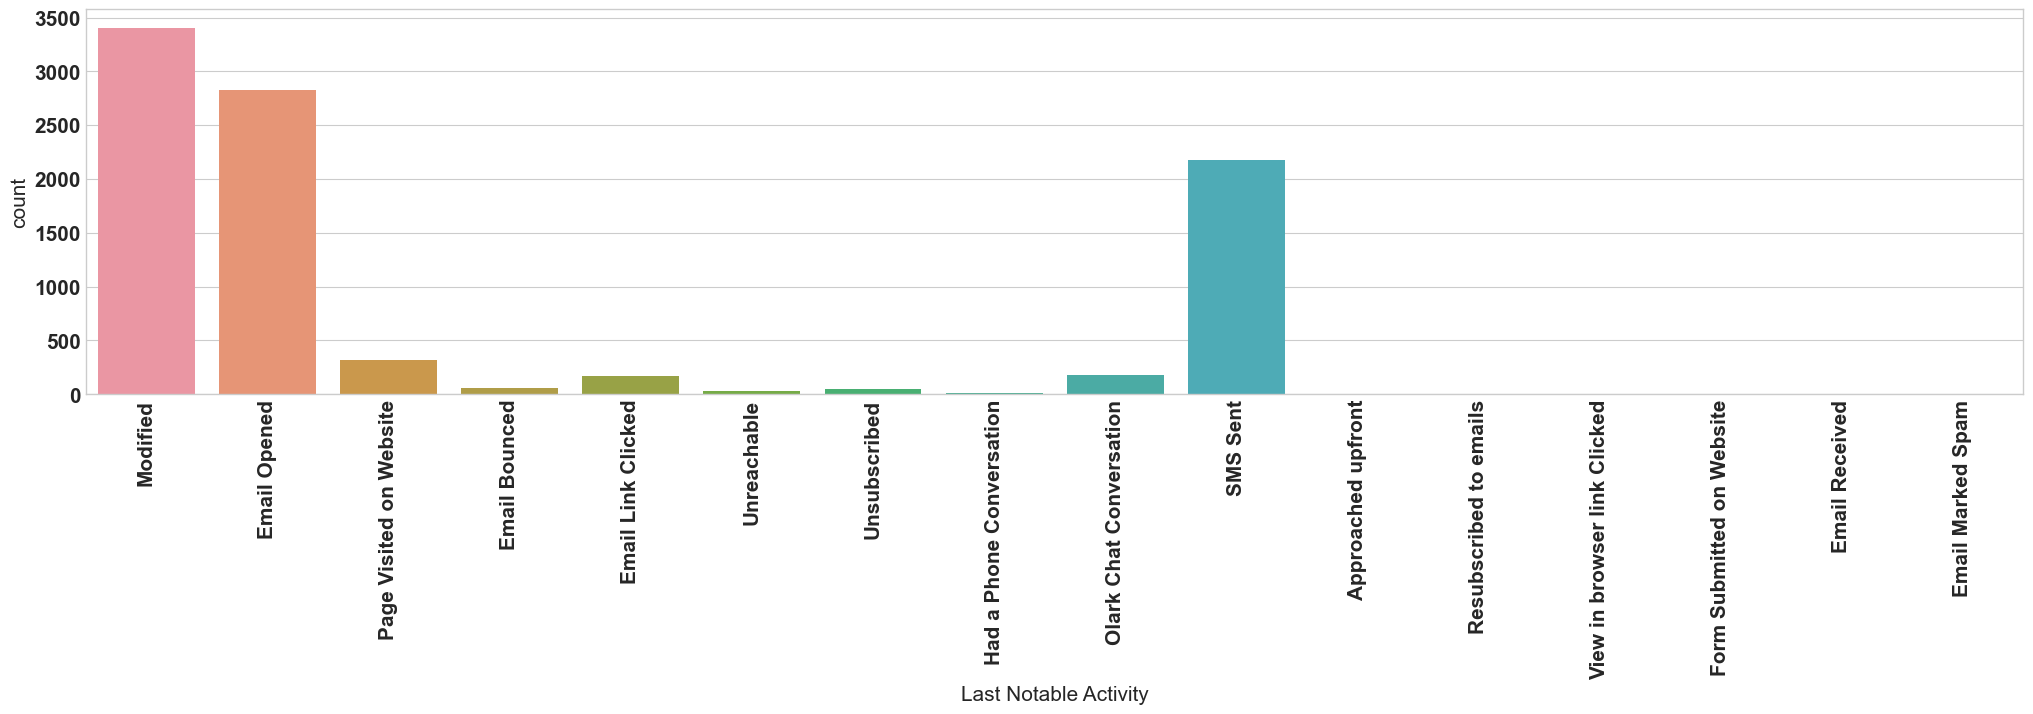

In [26]:
#categorical columns
for col in cat_cols:
    plot_count(x_edu_df, col)
    

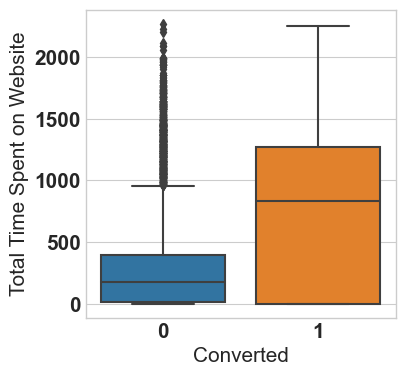

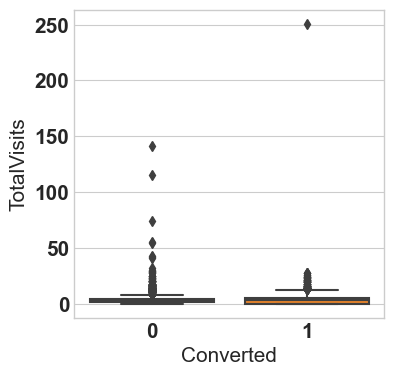

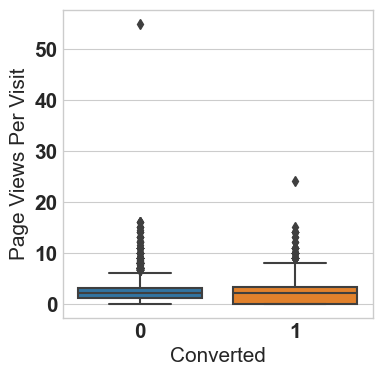

In [27]:
def int_converted(c1,c2):
    plt.figure(figsize=(4, 4))
    ax = sns.boxplot(x=c1, y=c2, data=x_edu_df)
    
    plt.show()



for c in numerical_column:
  int_converted('Converted',c)

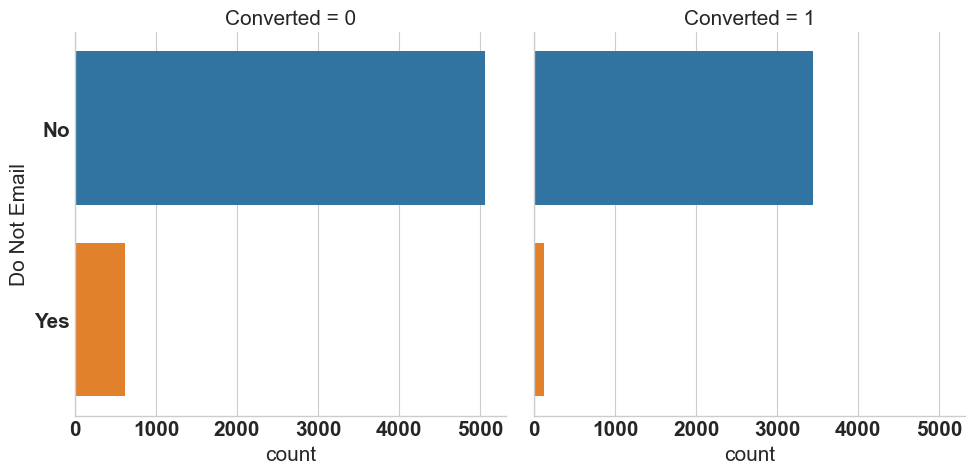

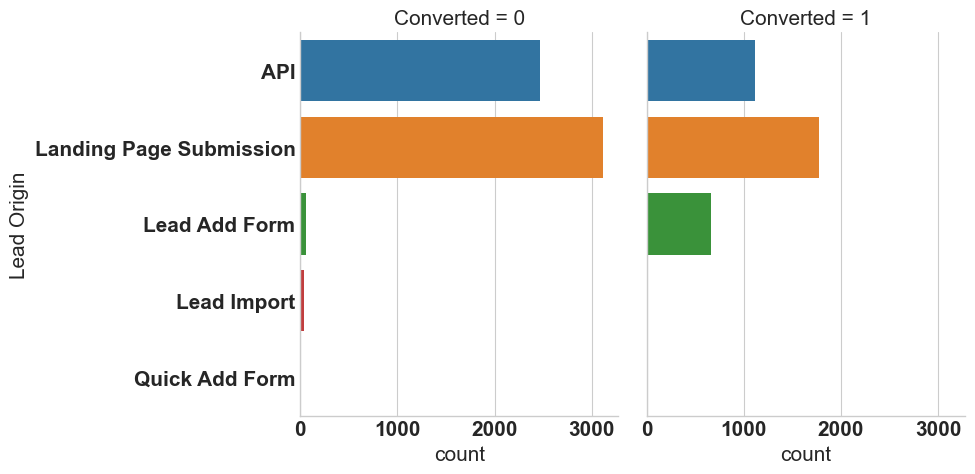

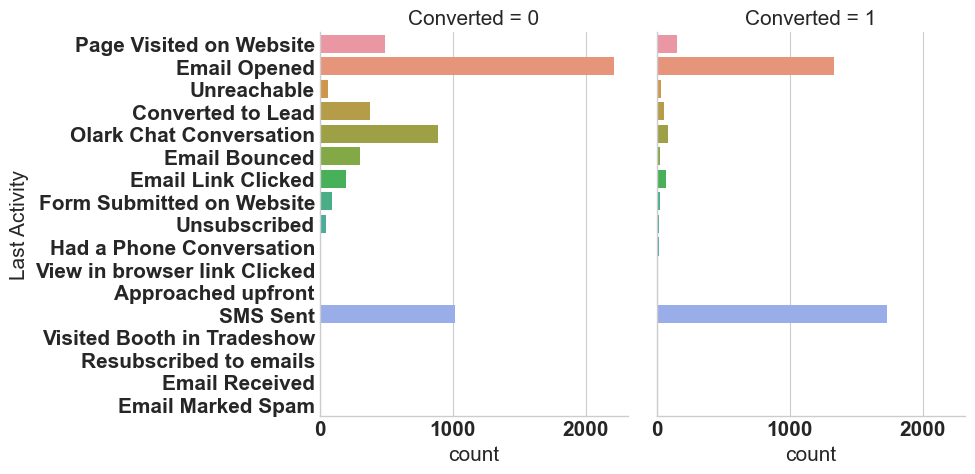

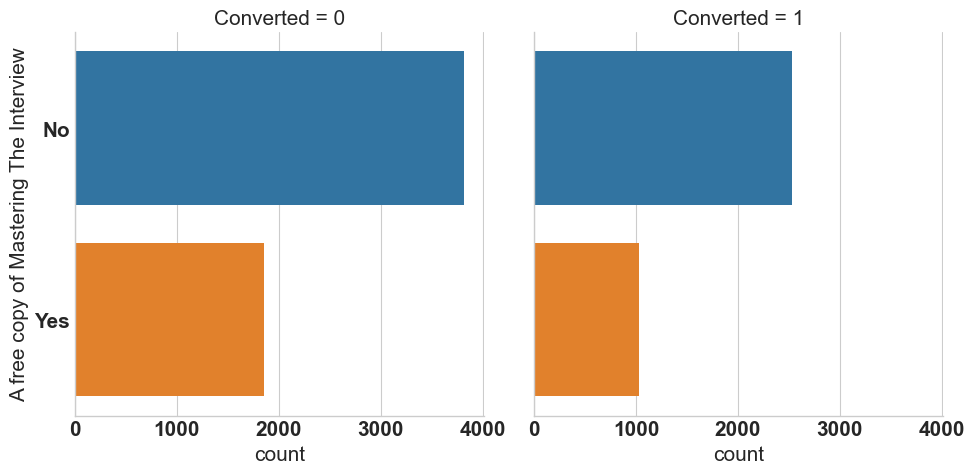

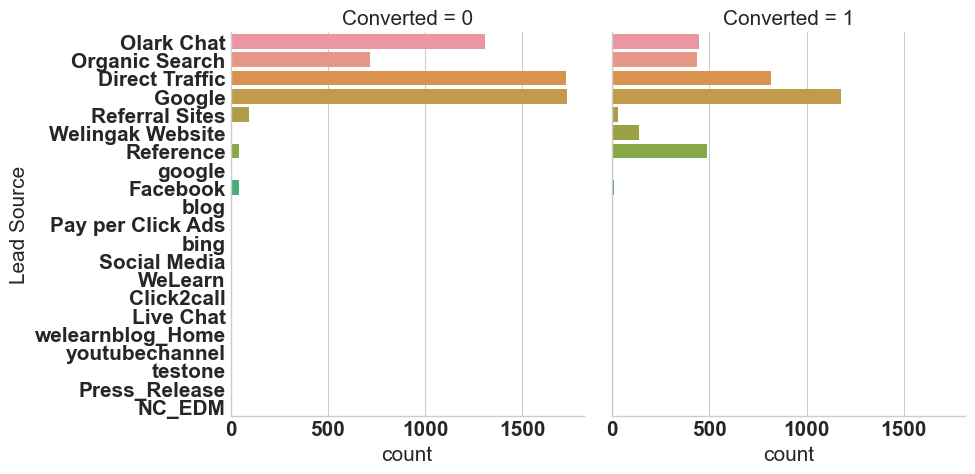

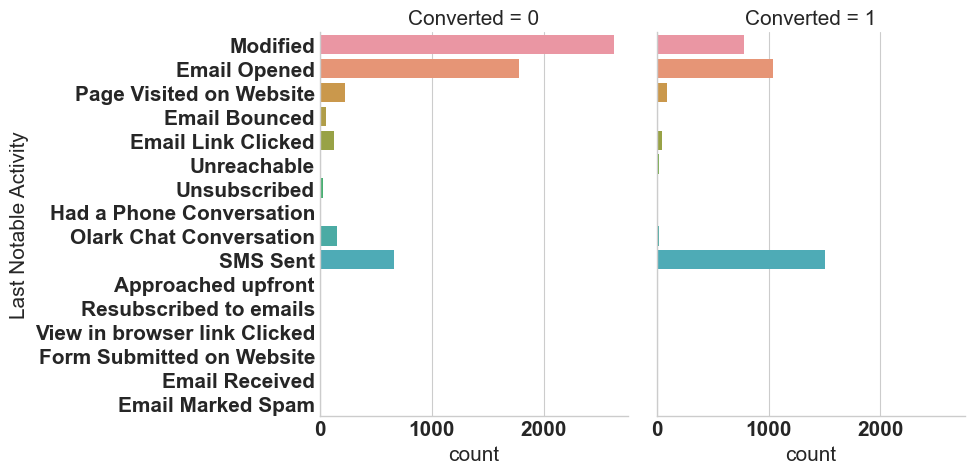

In [28]:
def cat_converted(c1,c2):
  sns.catplot(col=c1 ,y=c2, data=x_edu_df, kind="count")
  plt.show()

for c in cat_cols:
  cat_converted('Converted',c)


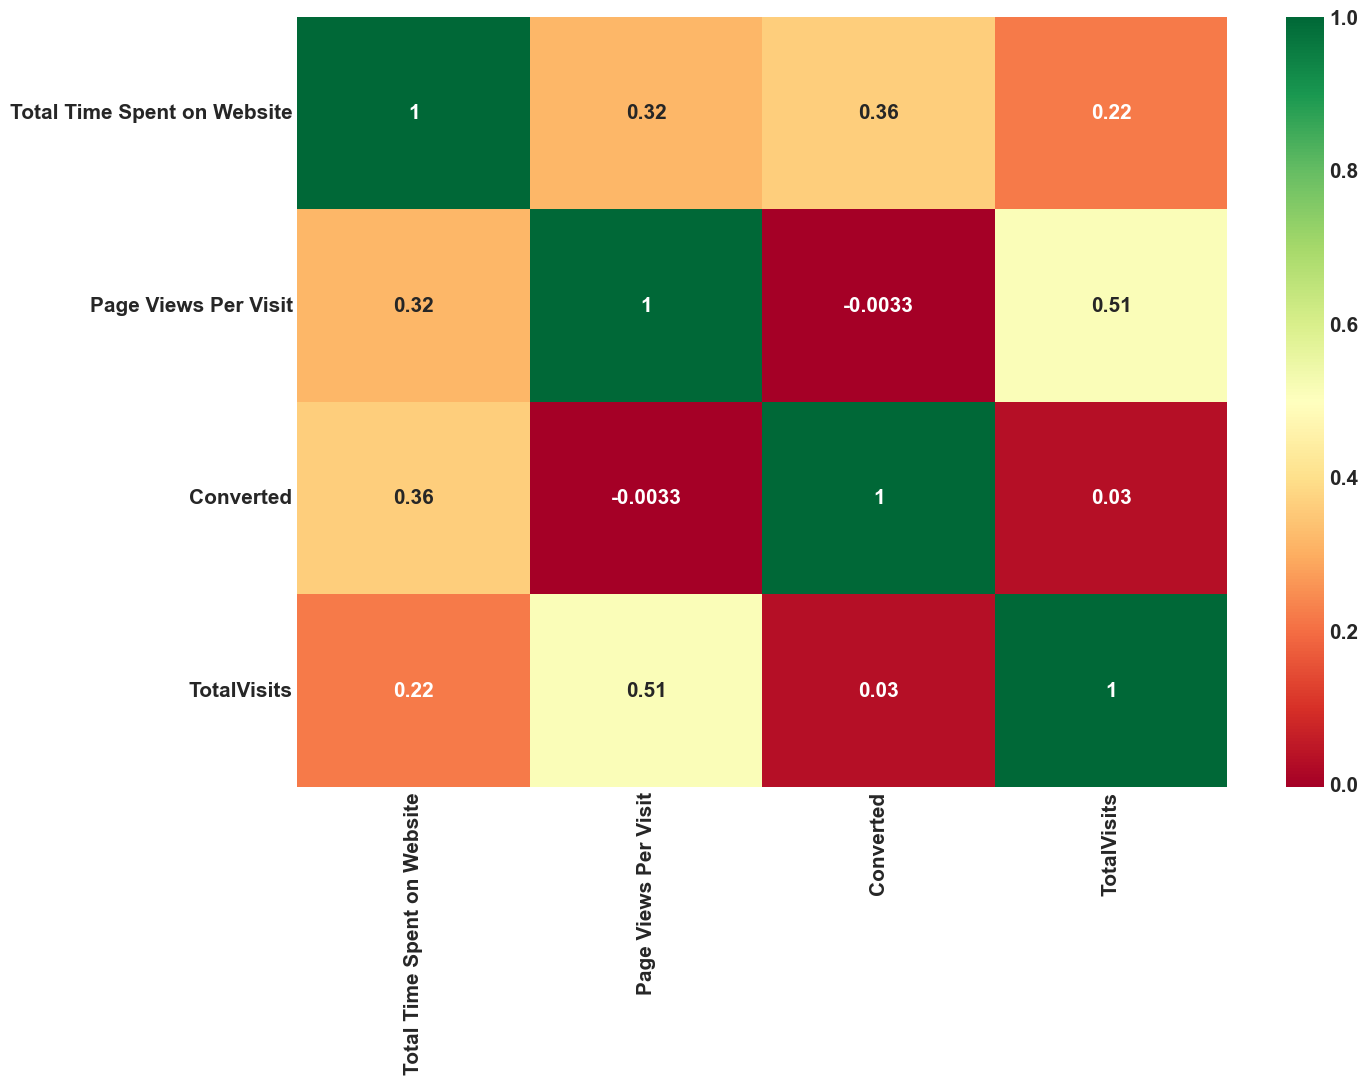

In [29]:
#correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(x_edu_df.corr(), annot=True, cmap='RdYlGn')
plt.show()

In [30]:
#finilize variable for model building
x_edu_df.head()

,Do Not Email,A free copy of Mastering The Interview,Lead Source,Total Time Spent on Website,Page Views Per Visit,Converted,Lead Origin,Last Activity,TotalVisits,Last Notable Activity
0,No,No,Olark Chat,0.0,0.0,0,API,Page Visited on Website,0.0,Modified
1,No,No,Organic Search,674.0,2.5,0,API,Email Opened,5.0,Email Opened
2,No,Yes,Direct Traffic,1532.0,2.0,1,Landing Page Submission,Email Opened,2.0,Email Opened
3,No,No,Direct Traffic,305.0,1.0,0,Landing Page Submission,Unreachable,1.0,Modified
4,No,No,Google,1428.0,1.0,1,Landing Page Submission,Converted to Lead,2.0,Modified


## Creating Dummy variables

In [31]:
#creating dummy variables for categorical columns
df_cat_dummy=pd.get_dummies(x_edu_df[cat_cols], drop_first=True)
df_cat_dummy.describe()

,Do Not Email_Yes,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,A free copy of Mastering The Interview_Yes,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.079437,0.528788,0.077706,0.005952,0.000108,0.046320,0.035281,0.028896,0.000216,0.383117,0.000216,0.012554,0.003247,0.105303,0.069264,0.000108,0.297078,0.010065,0.006602,0.000649,0.000108,0.312554,0.275216,0.005952,0.314286,0.000216,0.000108,0.189935,0.124892,0.000108,0.000216,0.057792,0.013528,0.000216,0.000108,0.015368,0.000649,0.000108,0.000541,0.000108,0.000108,0.000108,0.006494,0.018723,0.000216,0.305952,0.000108,0.000108,0.001515,0.368723,0.019805,0.034416,0.000108,0.235065,0.003463,0.005087,0.000108
std,0.270435,0.499198,0.267722,0.076926,0.010403,0.210189,0.184500,0.167524,0.014711,0.486173,0.014711,0.111346,0.056891,0.306960,0.253916,0.010403,0.456996,0.099823,0.080987,0.025475,0.010403,0.463559,0.446647,0.076926,0.464256,0.014711,0.010403,0.392271,0.330614,0.010403,0.014711,0.233363,0.115527,0.014711,0.010403,0.123018,0.025475,0.010403,0.023257,0.010403,0.010403,0.010403,0.080325,0.135552,0.014711,0.460835,0.010403,0.010403,0.038898,0.482485,0.139338,0.182304,0.010403,0.424062,0.058750,0.071142,0.010403
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

#### plot a correlation matrix to see the correlation between the variables

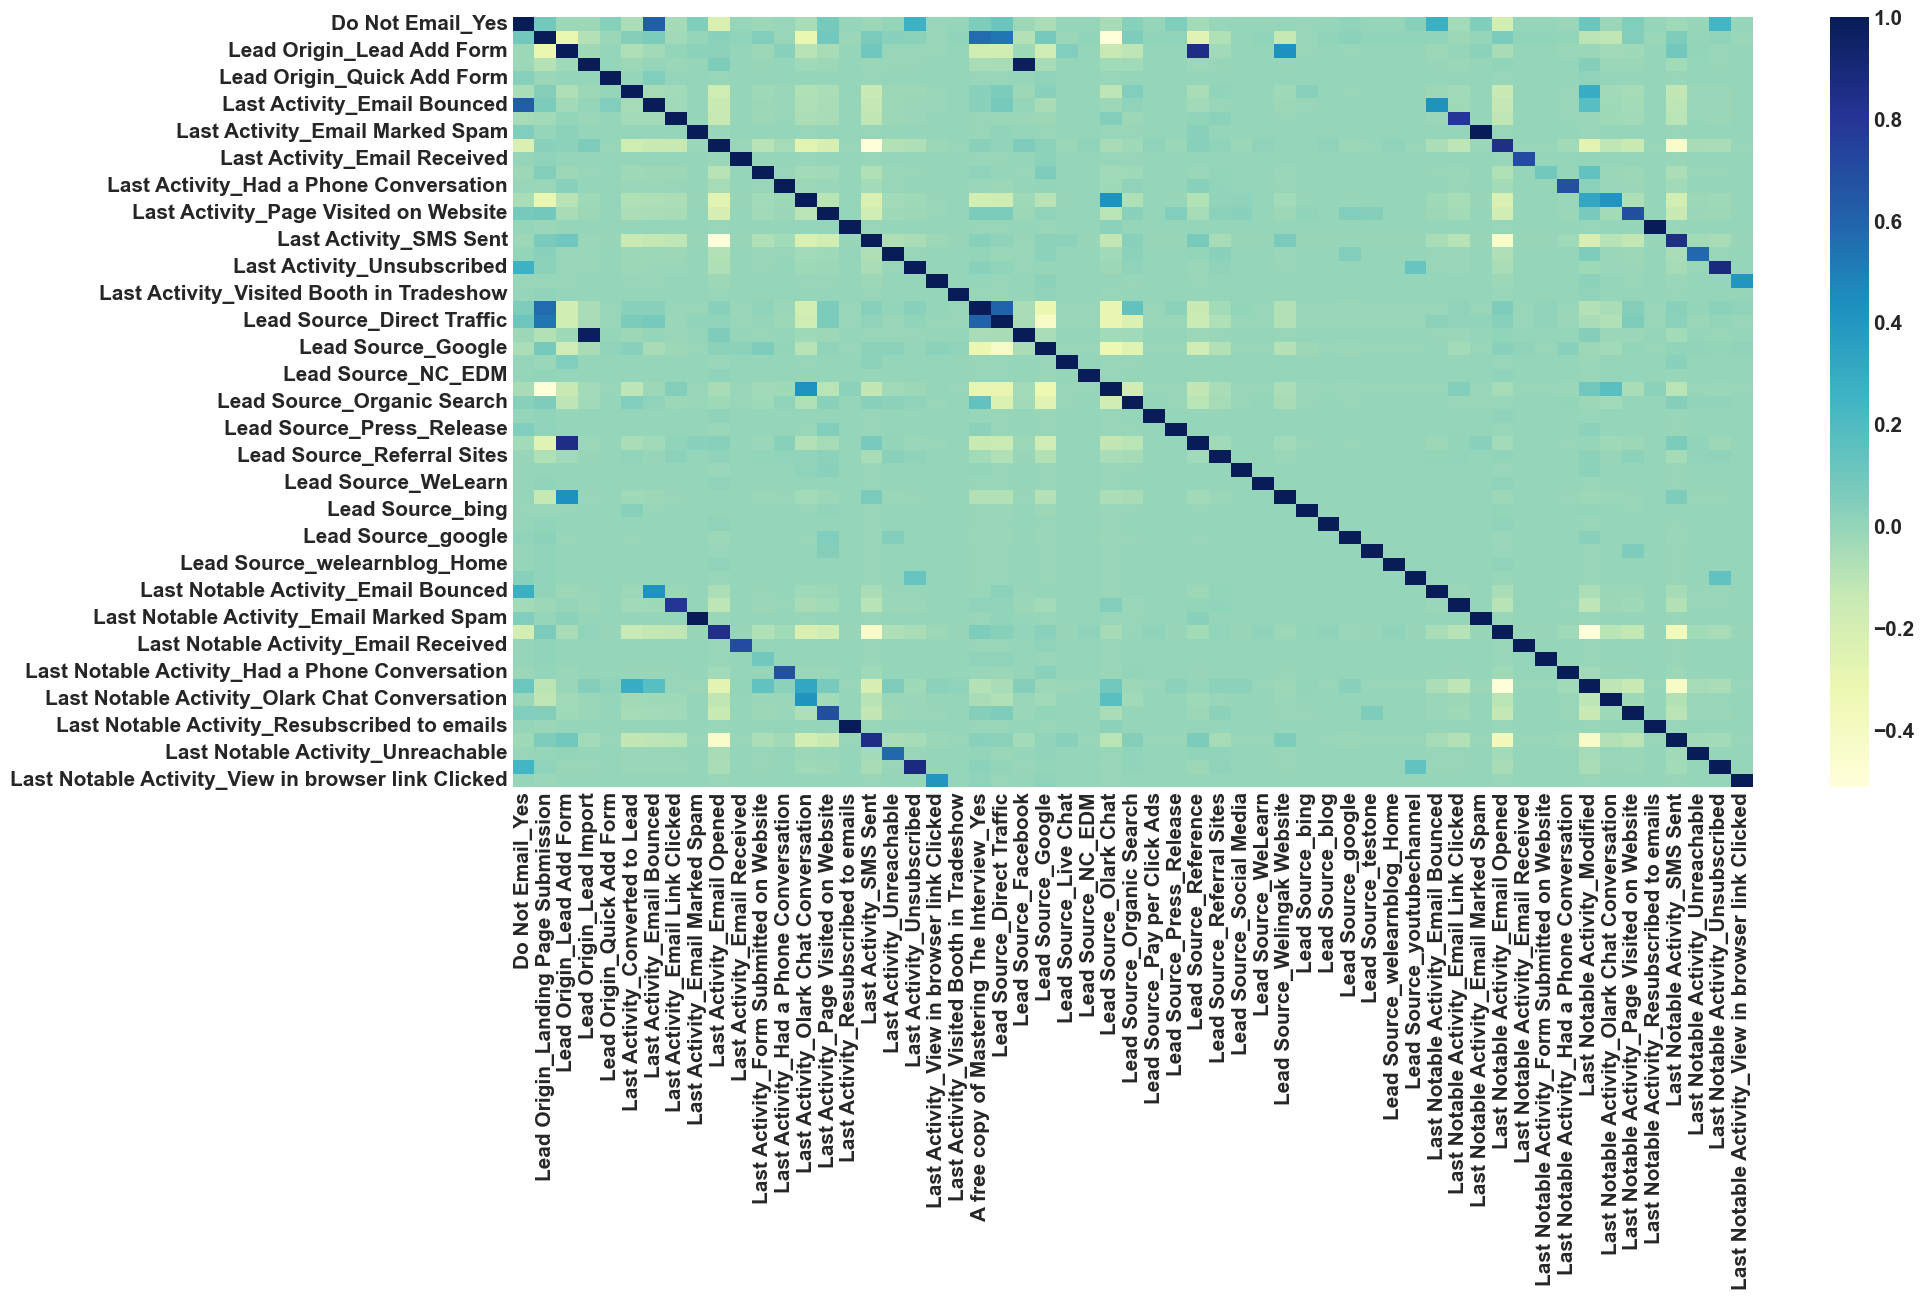

In [32]:
#correlation matrix
plt.figure(figsize=(20,10))
sns.heatmap(df_cat_dummy.corr(), cmap='YlGnBu')
plt.show()

In [33]:
#some of points are highly correlated to each other will drop later at the time of model building

In [34]:
#add dummy columns to final data frame
x_edu_df=pd.concat([x_edu_df,df_cat_dummy],axis=1)
#drop orignal categorical columns
x_edu_df=x_edu_df.drop(cat_cols,axis=1)
x_edu_df.head(2)

,Total Time Spent on Website,Page Views Per Visit,Converted,TotalVisits,Do Not Email_Yes,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,A free copy of Mastering The Interview_Yes,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,674.0,2.5,0,5.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [35]:
x_edu_df.shape

(9240, 61)

## Outlier Treatment of numerical columns

In [36]:
#add numeric columns to df_cat_dummy
x_edu_df.shape

(9240, 61)

In [37]:
df_cat_dummy.shape

(9240, 57)

In [38]:
#there are some outlier we can remove those +3 std and -3 std

#check for outlier
outlier=np.abs(stats.zscore(x_edu_df))

# Outlier +3
df_outlier=x_edu_df[(outlier>3).any(axis=1)]

x_edu_df=x_edu_df[(outlier<3).all(axis=1)]
x_edu_df.shape

(5973, 61)

##  Normalising of continuous variables

In [39]:
#  Normalising of continuous variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#numariacal columns
num_col=['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
#fit and transform
x_edu_df[num_col] = scaler.fit_transform(x_edu_df[num_col])
x_edu_df.head(2)

,Total Time Spent on Website,Page Views Per Visit,Converted,TotalVisits,Do Not Email_Yes,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,A free copy of Mastering The Interview_Yes,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1,0.264768,0.046641,0,0.621542,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1.796293,-0.224678,1,-0.467313,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [40]:
x_edu_df.shape

(5973, 61)

## Building the model


In [41]:
#splitting the data into train and test
from sklearn.model_selection import train_test_split
# Putting feature variable to X
X = x_edu_df.drop(['Converted'], axis=1)
# Putting response variable to y
y = x_edu_df['Converted']
#splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

#lets check the shape of train and test data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)



(4181, 60)
(1792, 60)
(4181,)
(1792,)


#### lets build the model using RFE becuase we have lots of variables filter first


In [42]:
# Running RFE with the output number of the variable equal 
from turtle import st


lm = LogisticRegression(max_iter=1000, random_state=100, class_weight='balanced')
lm.fit(X_train, y_train)
rfe = RFE(estimator=lm, n_features_to_select=20)
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

#col with rfe support true
col = X_train.columns[rfe.support_]
#col with rfe support false
nots = X_train.columns[~rfe.support_]

#print both col
print(col)
print(nots)



Index(['Total Time Spent on Website', 'Page Views Per Visit', 'TotalVisits', 'Do Not Email_Yes', 'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent', 'A free copy of Mastering The Interview_Yes',
       'Lead Source_Direct Traffic', 'Lead Source_Google', 'Lead Source_Olark Chat', 'Lead Source_Organic Search', 'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_Resubscribed to emails', 'Last Notable Activity_SMS Sent'],
      dtype='object')
Index(['Last Activity_Converted to Lead', 'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam', 'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website', 'Last Activity_Had a Phone Conversation', 'Last Activity_Page Visited on Website', 'Last Activity_Resub

In [43]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('TotalVisits', True, 1),
 ('Do Not Email_Yes', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Origin_Quick Add Form', True, 1),
 ('Last Activity_Converted to Lead', False, 3),
 ('Last Activity_Email Bounced', False, 5),
 ('Last Activity_Email Link Clicked', False, 7),
 ('Last Activity_Email Marked Spam', False, 9),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Email Received', False, 13),
 ('Last Activity_Form Submitted on Website', False, 15),
 ('Last Activity_Had a Phone Conversation', False, 17),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Page Visited on Website', False, 21),
 ('Last Activity_Resubscribed to emails', False, 31),
 ('Last Activity_SMS Sent', True, 1),
 ('Last Activity_Unreachable', False, 25),
 ('Last Activity_Unsubscribed', False, 32),
 ('Last Acti

In [44]:
# RFE selected  some of indicators are not stable selected below features after running model 
final_col=['Total Time Spent on Website', 'TotalVisits', 'Last Activity_Page Visited on Website', 'Last Activity_Email Opened', 
'Lead Source_Olark Chat', 'Last Notable Activity_SMS Sent', 'Last Notable Activity_View in browser link Clicked', 'Page Views Per Visit', 'Lead Origin_Landing Page Submission', 
'Last Notable Activity_Email Marked Spam', 'Last Activity_Had a Phone Conversation', 'Lead Source_Google', 'Last Activity_Form Submitted on Website', 'A free copy of Mastering The Interview_Yes', 
'Last Notable Activity_Unsubscribed', 'Last Activity_Email Received', 'Last Notable Activity_Modified', 'Last Activity_SMS Sent', 'Lead Source_bing', 'Last Activity_Olark Chat Conversation']

notselected=['Lead Source_Facebook', 'Last Notable Activity_Olark Chat Conversation', 'Do Not Email_Yes', 'Last Activity_Visited Booth in Tradeshow', 'Lead Source_Pay per Click Ads',
 'Last Activity_View in browser link Clicked', 'Last Notable Activity_Form Submitted on Website', 'Last Activity_Email Bounced', 'Lead Source_welearnblog_Home', 'Lead Source_Organic Search',
 'Lead Source_WeLearn', 'Last Activity_Resubscribed to emails', 'Last Activity_Converted to Lead', 'Last Notable Activity_Unreachable', 'Last Notable Activity_Page Visited on Website', 'Last Notable Activity_Resubscribed to emails', 'Last Notable Activity_Email Opened',
 'Lead Origin_Lead Add Form', 'Lead Source_Referral Sites', 'Lead Source_blog', 'Lead Source_Welingak Website', 'Lead Source_NC_EDM', 'Last Notable Activity_Had a Phone Conversation',
 'Lead Origin_Quick Add Form', 'Lead Origin_Lead Import', 'Lead Source_Social Media', 'Last Activity_Email Link Clicked', 'Last Activity_Unsubscribed', 'Lead Source_google',
 'Last Notable Activity_Email Bounced', 'Last Activity_Email Marked Spam', 'Last Notable Activity_Email Received', 'Lead Source_Direct Traffic', 'Lead Source_Press_Release', 'Lead Source_Reference',
 'Lead Source_testone', 'Last Notable Activity_Email Link Clicked', 'Last Activity_Unreachable', 'Lead Source_youtubechannel', 'Lead Source_Live Chat']


#select final_col list for X_train.columns from final_col
X_train_1= X_train[final_col]

lm = LogisticRegression(max_iter=1000, random_state=100, class_weight='balanced')
lm.fit(X_train_1, y_train)
rfe = RFE(estimator=lm, n_features_to_select=20)
rfe = rfe.fit(X_train_1, y_train)
list(zip(X_train_1.columns,rfe.support_,rfe.ranking_))

#col with rfe support true
col = X_train_1.columns[rfe.support_]
#col with rfe support false
nots = X_train_1.columns[~rfe.support_]

#print both col
print(col)
print(nots)
print(len(final_col))


Index(['Total Time Spent on Website', 'TotalVisits', 'Last Activity_Page Visited on Website', 'Last Activity_Email Opened', 'Lead Source_Olark Chat', 'Last Notable Activity_SMS Sent',
       'Last Notable Activity_View in browser link Clicked', 'Page Views Per Visit', 'Lead Origin_Landing Page Submission', 'Last Notable Activity_Email Marked Spam',
       'Last Activity_Had a Phone Conversation', 'Lead Source_Google', 'Last Activity_Form Submitted on Website', 'A free copy of Mastering The Interview_Yes', 'Last Notable Activity_Unsubscribed',
       'Last Activity_Email Received', 'Last Notable Activity_Modified', 'Last Activity_SMS Sent', 'Lead Source_bing', 'Last Activity_Olark Chat Conversation'],
      dtype='object')
Index([], dtype='object')
20


In [45]:
#model building using statsmodel
import statsmodels.api as sm
#create function
def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
    res = logm1.fit()
    print(res.summary())
    print("-vif-"*20)

    vif = pd.DataFrame()
    vif['Features'] = X_train[cols].columns
    vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)
    print("---roc---"*20)
    #predict
    y_train_pred = res.predict(X_train_sm).values.reshape(-1)
    y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
    y_train_pred_final['Lead Number'] = y_train.index
    y_train_pred_final.head()
    #create new column
    y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
    #confusion matrix
    conf = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
    draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)
    #print accuracy
    print("Accuracy",metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))
    #print sensitivity
    print("Sensitivity",conf[1,1]/(conf[1,0]+conf[1,1]))
    #print specificity
    print("Specificity",conf[0,0]/(conf[0,0]+conf[0,1]))
    #print precision
    print("Precision",conf[1,1]/(conf[0,1]+conf[1,1]))
    #print recall
    print("Recall",conf[1,1]/(conf[1,0]+conf[1,1]))
    #print f1 score
    print("F1 Score",metrics.f1_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

    return conf


#graph for ROC curve
def draw_roc(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate = False)
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize=(20, 10))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    return None

 



                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4181
Model:                            GLM   Df Residuals:                     4168
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2018.6
Date:                Tue, 03 Jan 2023   Deviance:                       4037.3
Time:                        20:31:33   Pearson chi2:                 4.24e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.3153
Covariance Type:            nonrobust                                         
                                                         coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------

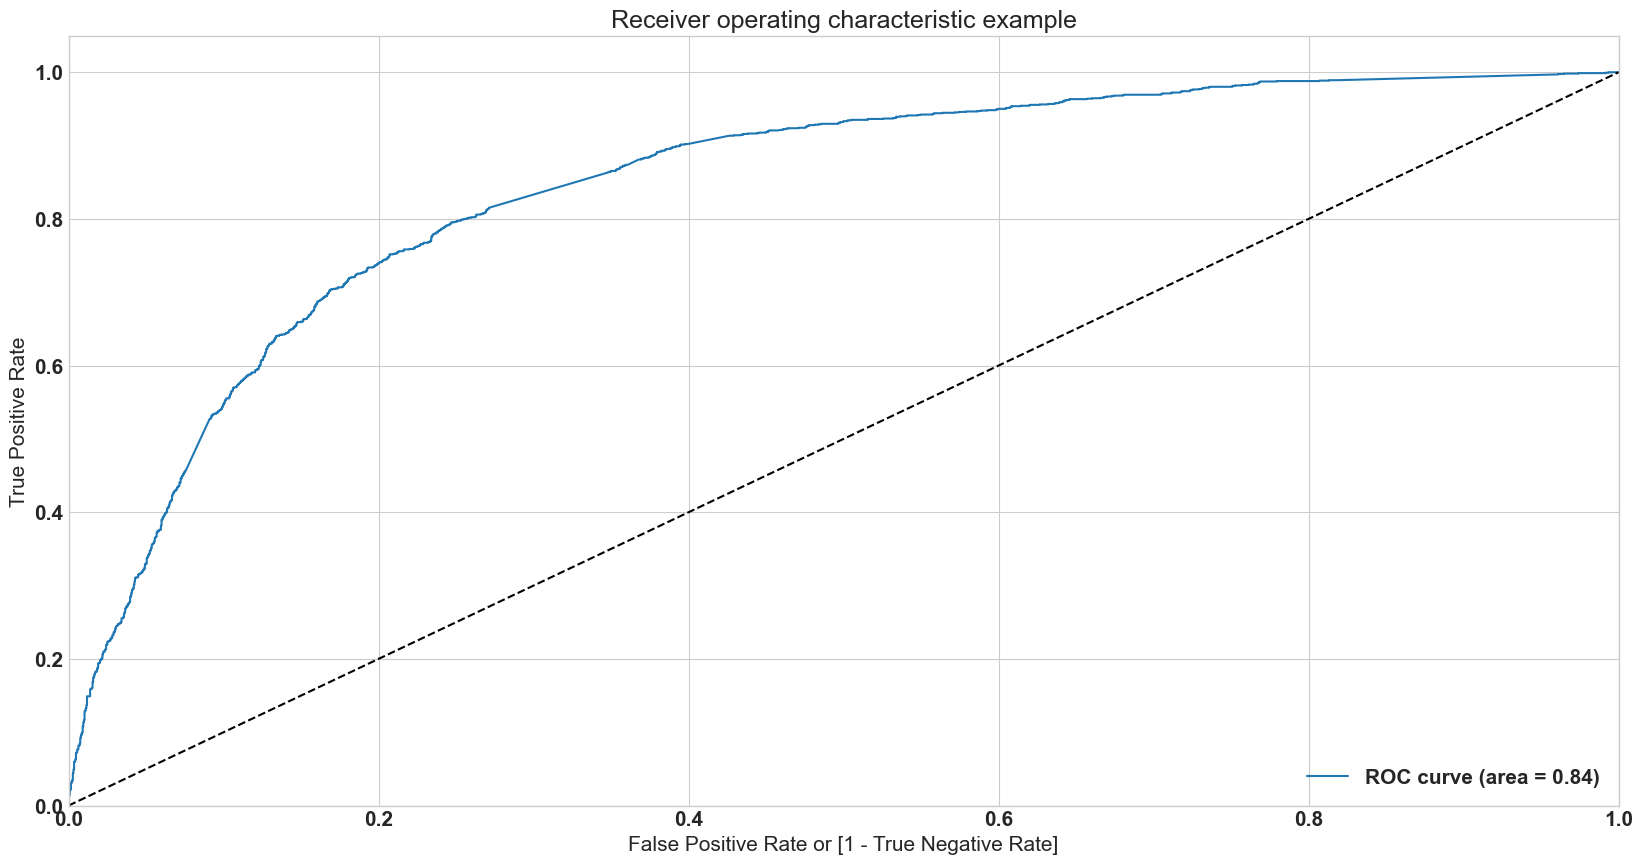

Accuracy 0.7754125807223152
Sensitivity 0.6592548076923077
Specificity 0.8522050059594756
Precision 0.7467665078284548
Recall 0.6592548076923077
F1 Score 0.7002872646026174


<function print>

In [46]:
#model1
conf = build_model(col)
print

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4181
Model:                            GLM   Df Residuals:                     4168
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2018.6
Date:                Tue, 03 Jan 2023   Deviance:                       4037.3
Time:                        20:31:34   Pearson chi2:                 4.24e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.3153
Covariance Type:            nonrobust                                         
                                                         coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------

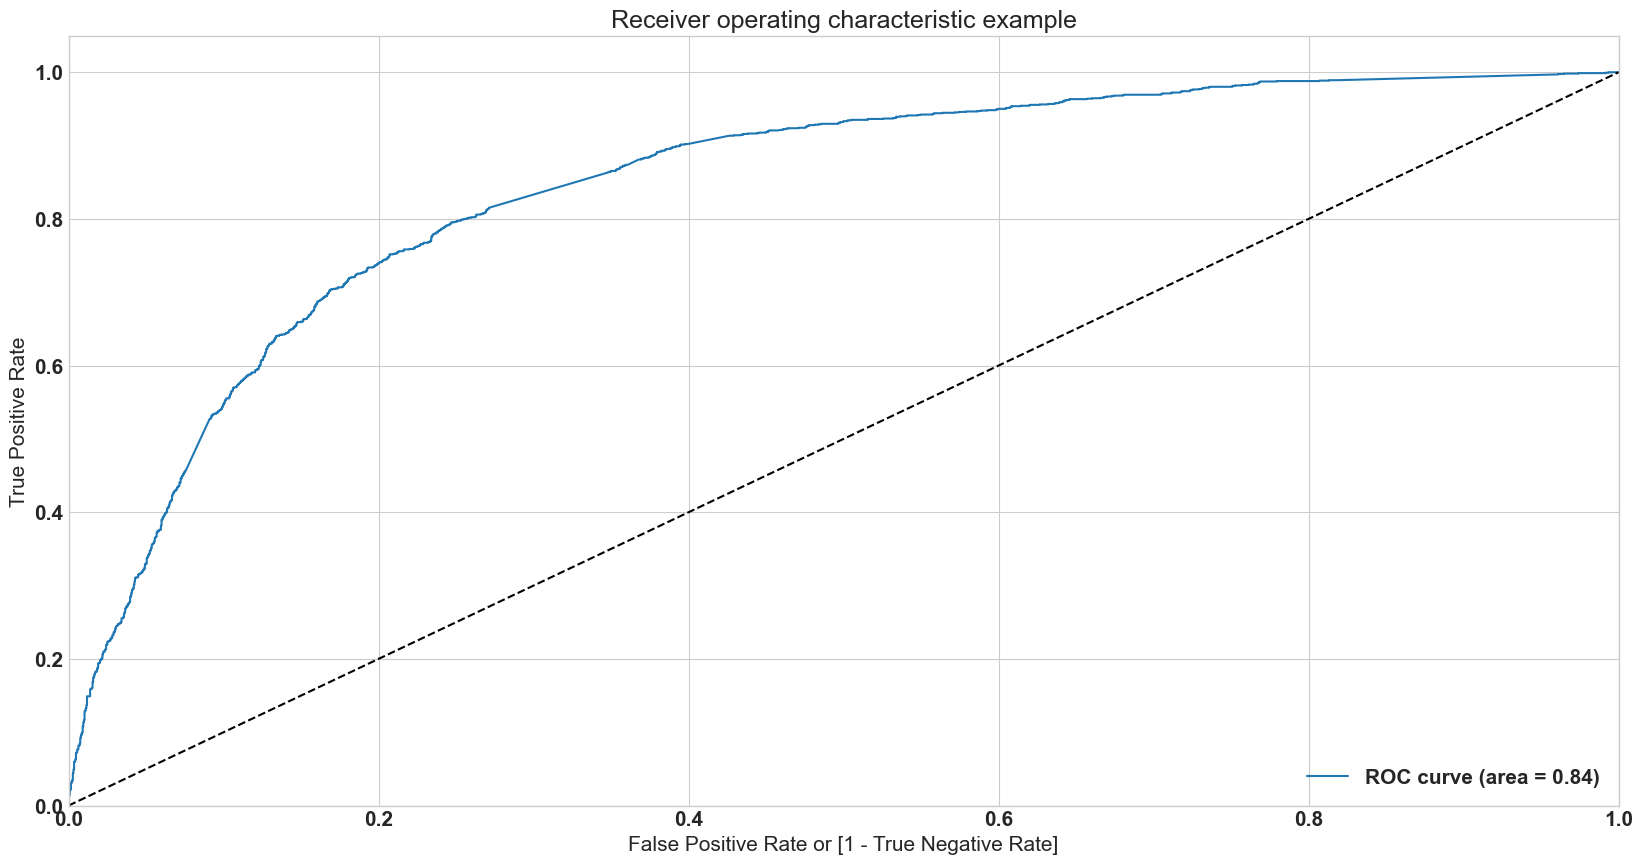

Accuracy 0.7754125807223152
Sensitivity 0.6592548076923077
Specificity 0.8522050059594756
Precision 0.7467665078284548
Recall 0.6592548076923077
F1 Score 0.7002872646026174
[[2145  372]
 [ 567 1097]]


In [47]:
#remove Last Activity_Page Visited on Website
col_2 = col.drop('Last Activity_Page Visited on Website', 1)
#model2
conf_2 = build_model(col_2)
print(conf_2)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4181
Model:                            GLM   Df Residuals:                     4169
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2022.5
Date:                Tue, 03 Jan 2023   Deviance:                       4045.1
Time:                        20:31:35   Pearson chi2:                 4.25e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3140
Covariance Type:            nonrobust                                         
                                                         coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------

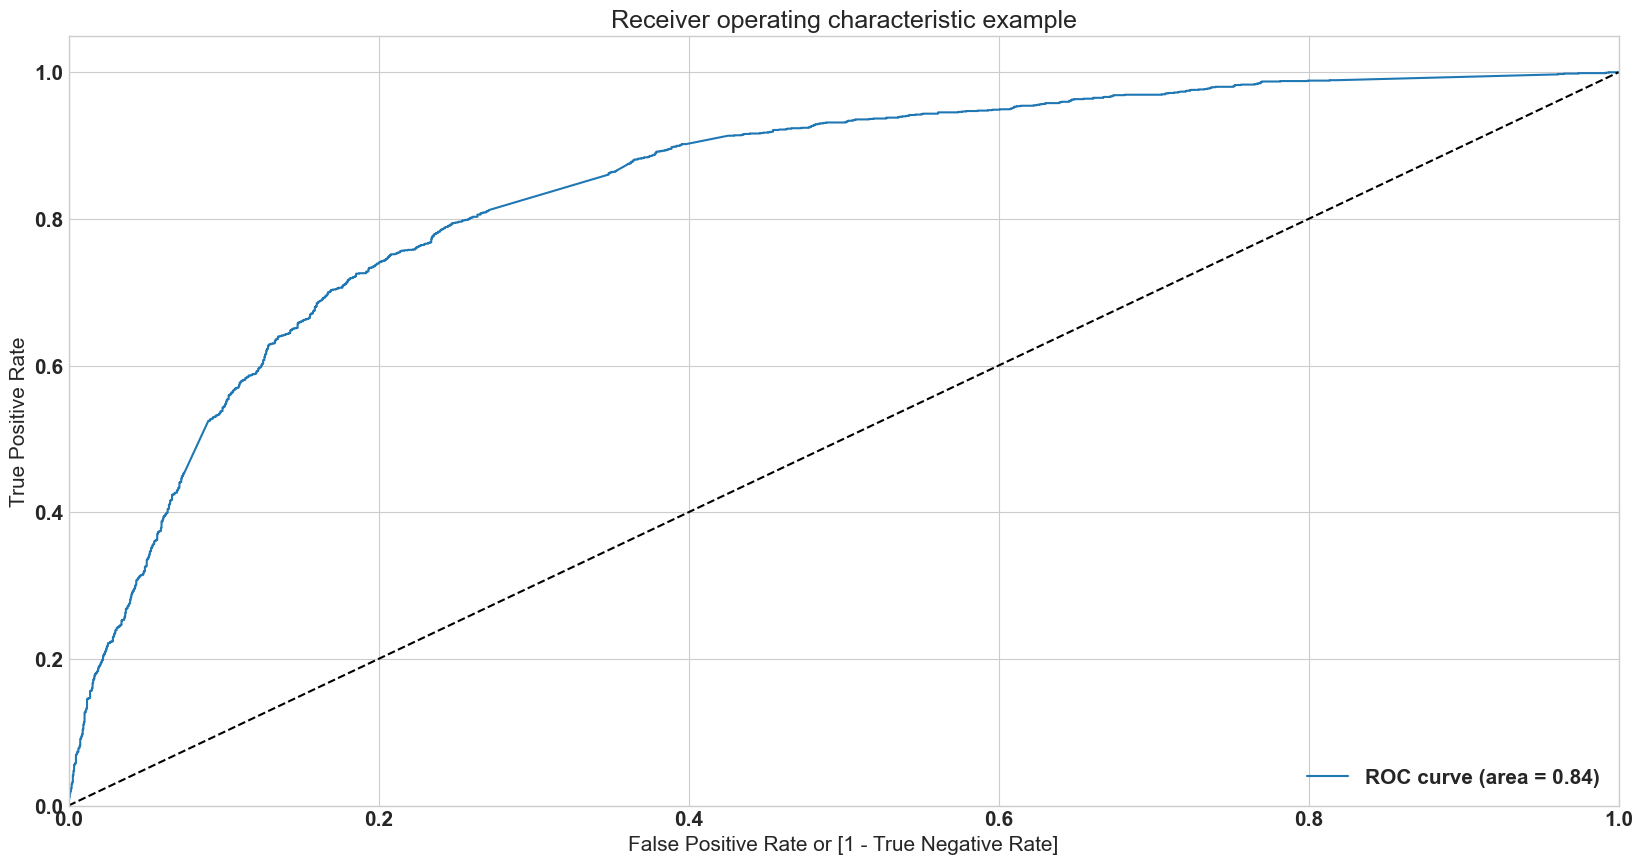

Accuracy 0.7746950490313322
Sensitivity 0.6586538461538461
Specificity 0.8514104092173223
Precision 0.745578231292517
Recall 0.6586538461538461
F1 Score 0.6994256541161455
[[2143  374]
 [ 568 1096]]


In [48]:
#drop Last Activity_SMS Sent
col_3=col_2.drop('Last Activity_SMS Sent',1)
#model3
conf_3 = build_model(col_3)
print(conf_3)


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4181
Model:                            GLM   Df Residuals:                     4169
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2022.5
Date:                Tue, 03 Jan 2023   Deviance:                       4045.1
Time:                        20:31:35   Pearson chi2:                 4.25e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3140
Covariance Type:            nonrobust                                         
                                                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

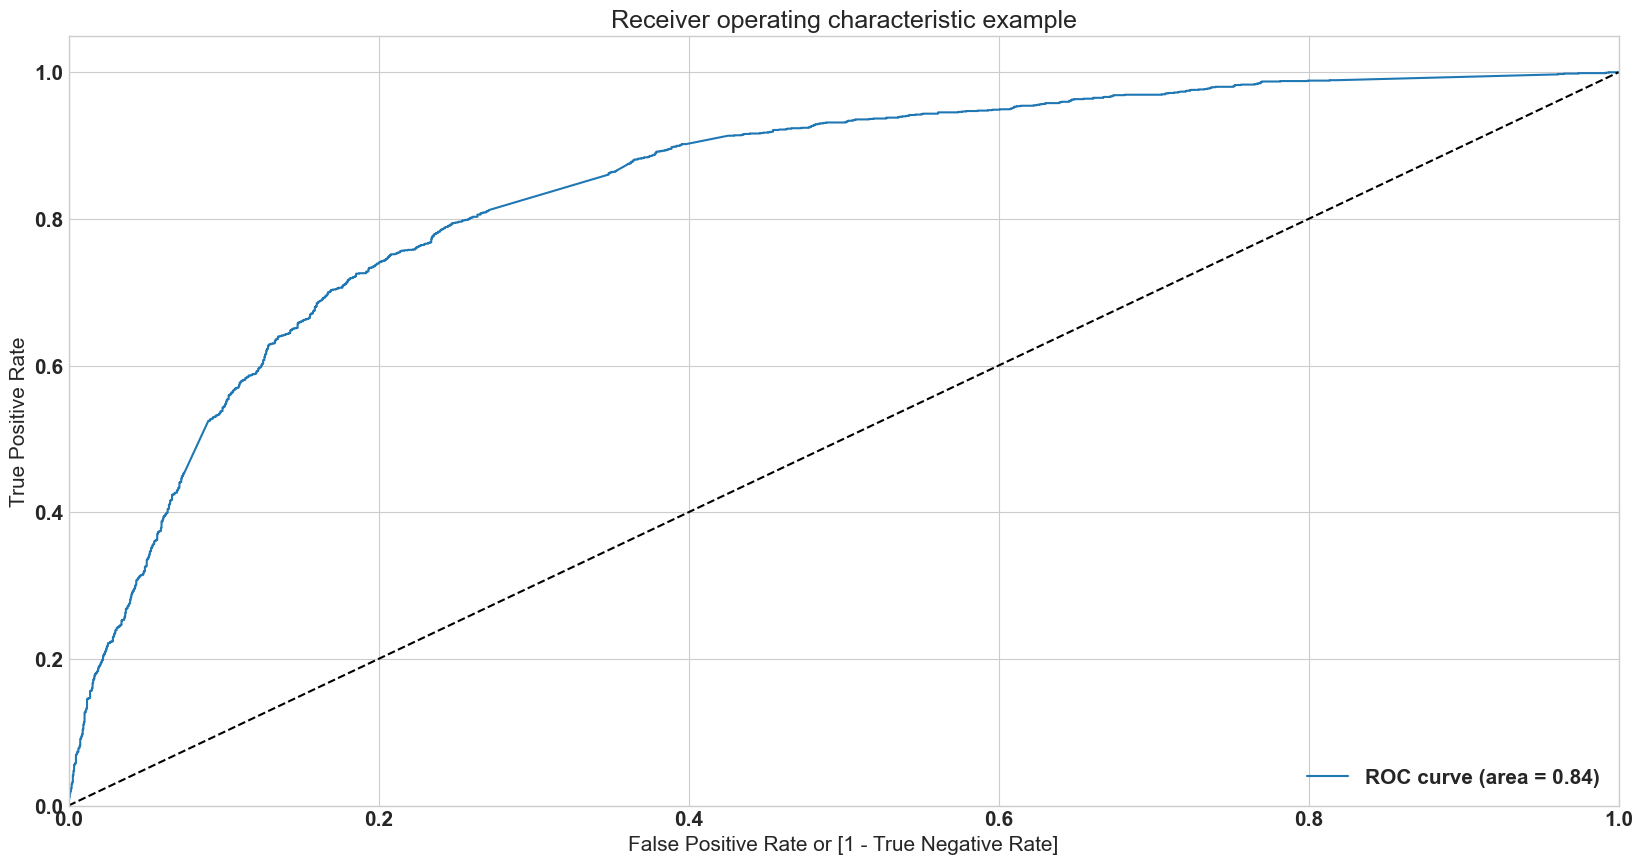

Accuracy 0.7746950490313322
Sensitivity 0.6586538461538461
Specificity 0.8514104092173223
Precision 0.745578231292517
Recall 0.6586538461538461
F1 Score 0.6994256541161455
[[2143  374]
 [ 568 1096]]


In [49]:
#remove Last Notable Activity_View in browser link Clicked
col_4 = col_3.drop('Last Notable Activity_View in browser link Clicked', 1)
#model4
conf_4 = build_model(col_4)
print(conf_4)


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4181
Model:                            GLM   Df Residuals:                     4170
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2025.1
Date:                Tue, 03 Jan 2023   Deviance:                       4050.2
Time:                        20:31:36   Pearson chi2:                 4.25e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3132
Covariance Type:            nonrobust                                         
                                                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

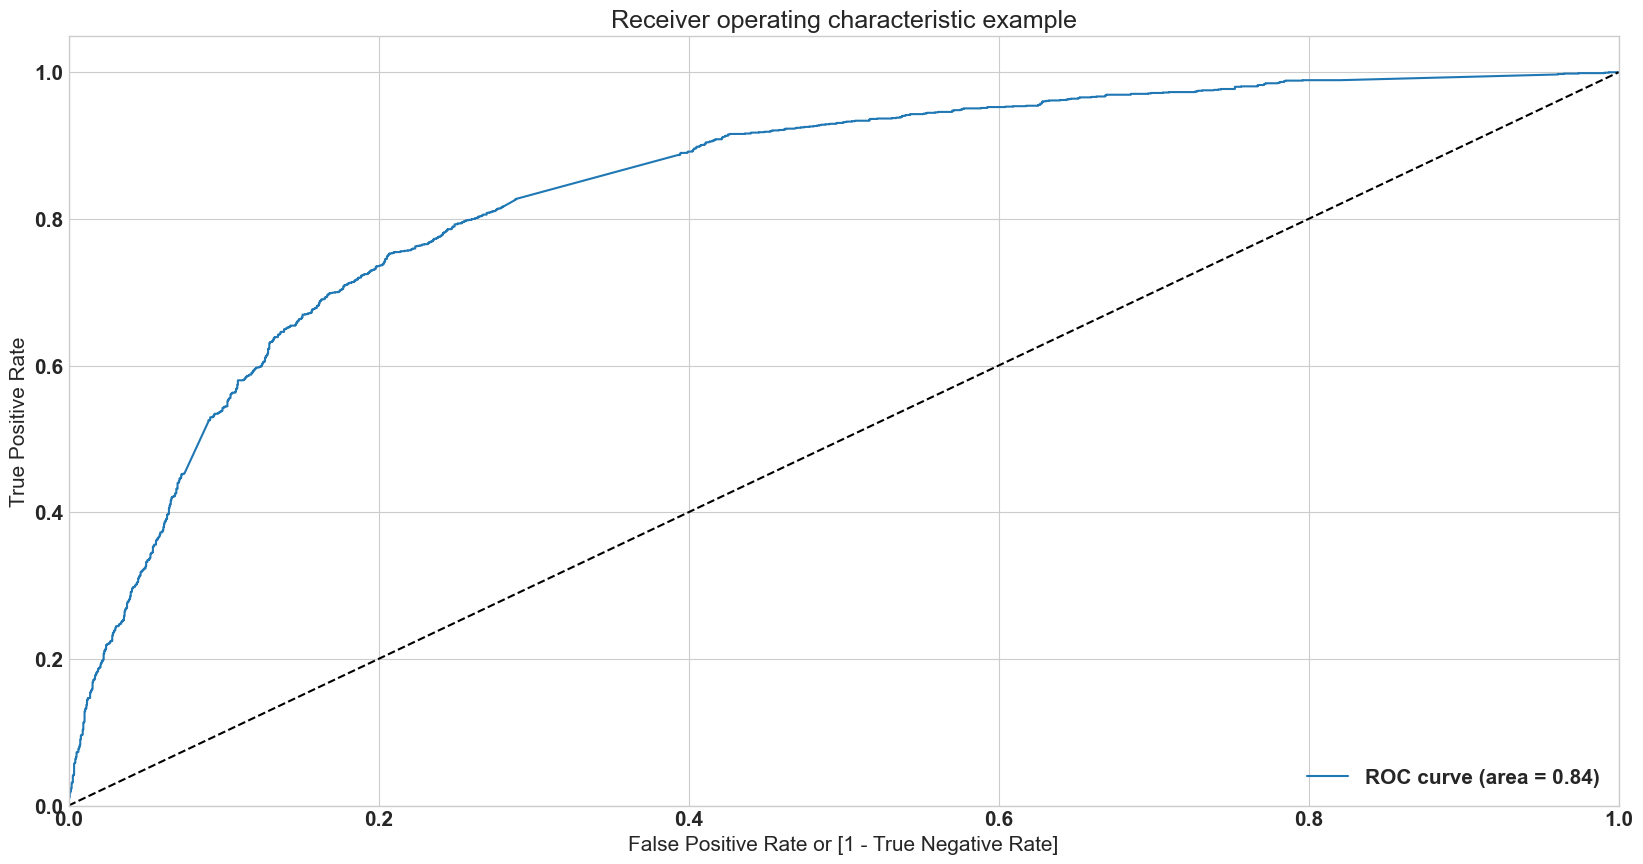

Accuracy 0.7758909351829706
Sensitivity 0.6616586538461539
Specificity 0.8514104092173223
Precision 0.7464406779661017
Recall 0.6616586538461539
F1 Score 0.701497292131252
[[2143  374]
 [ 563 1101]]


In [50]:
#remove Last Notable Activity_Modified after removing as it means something hard to expain 
col_5 = col_4.drop('Last Notable Activity_Modified', 1)
#model5
conf_5 = build_model(col_5)
print(conf_5)


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4181
Model:                            GLM   Df Residuals:                     4171
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2025.1
Date:                Tue, 03 Jan 2023   Deviance:                       4050.2
Time:                        20:31:37   Pearson chi2:                 4.25e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3132
Covariance Type:            nonrobust                                         
                                                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

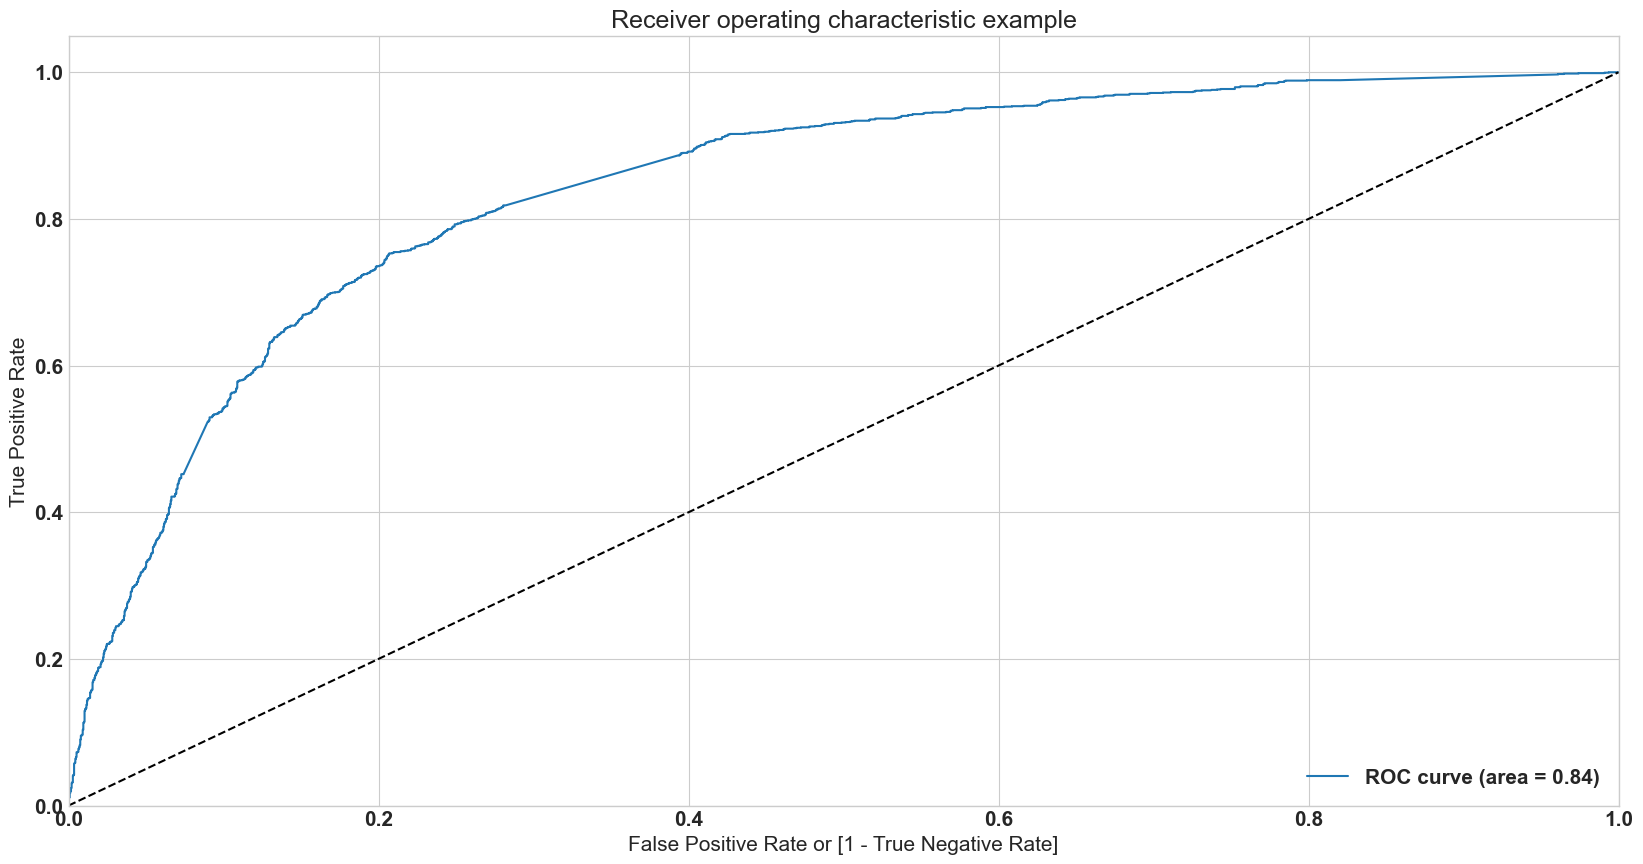

Accuracy 0.7761301124132982
Sensitivity 0.6622596153846154
Specificity 0.8514104092173223
Precision 0.7466124661246613
Recall 0.6622596153846154
F1 Score 0.7019108280254777
[[2143  374]
 [ 562 1102]]


In [51]:
#remove Last Activity_Email Opened
col_6 = col_5.drop('Last Activity_Email Opened', 1)
#model6
conf_6 = build_model(col_6)
print(conf_6)


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4181
Model:                            GLM   Df Residuals:                     4172
Model Family:                Binomial   Df Model:                            8
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2025.4
Date:                Tue, 03 Jan 2023   Deviance:                       4050.8
Time:                        20:31:37   Pearson chi2:                 4.25e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3131
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

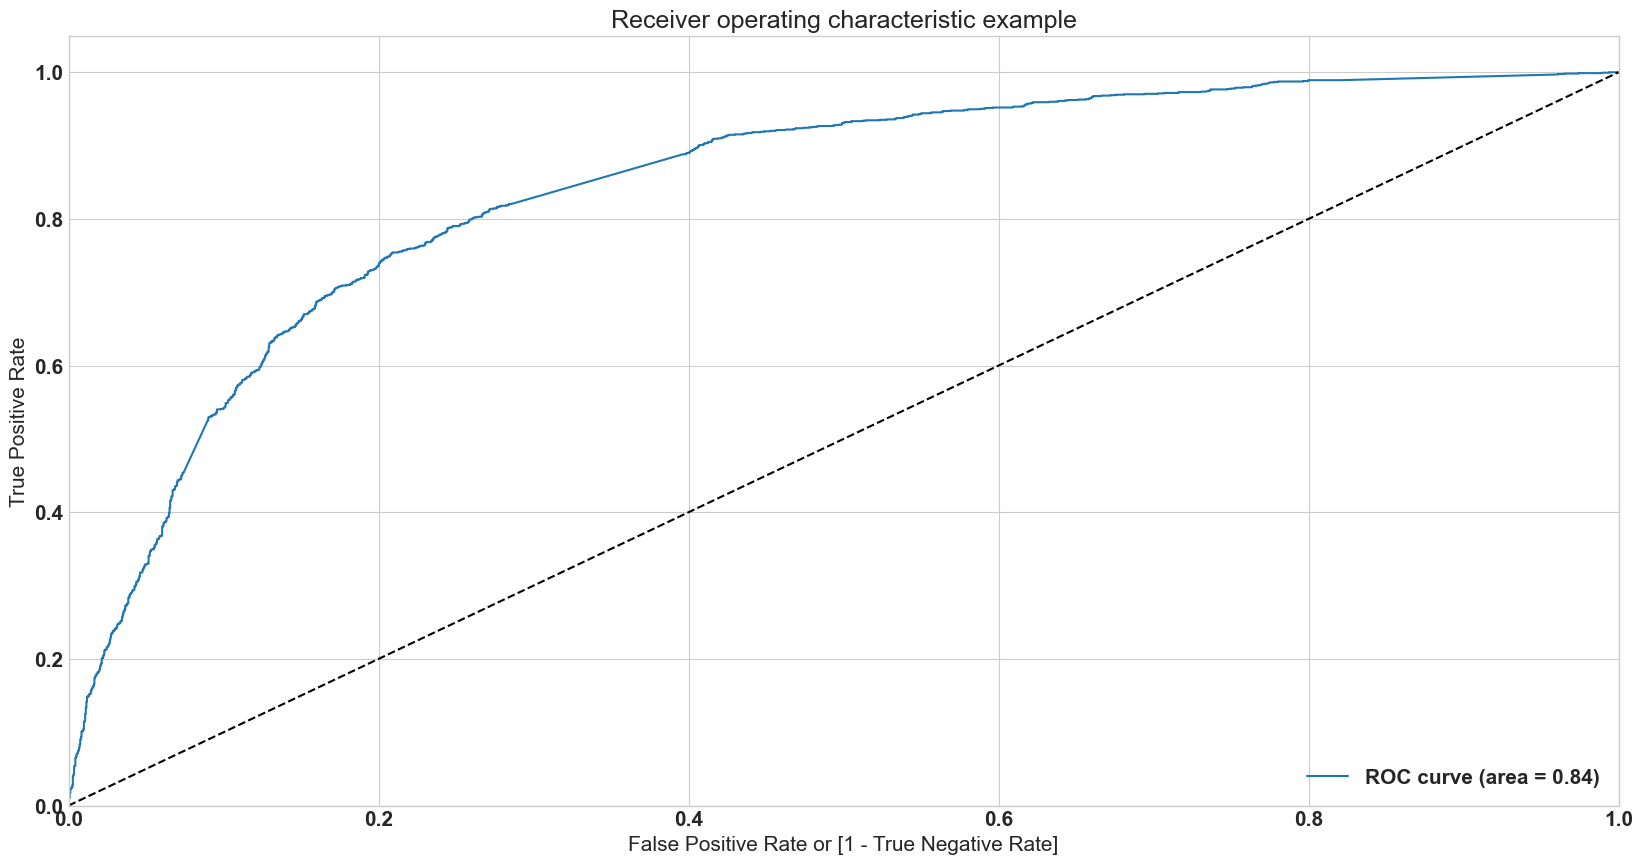

Accuracy 0.7749342262616599
Sensitivity 0.6580528846153846
Specificity 0.8522050059594756
Precision 0.7464212678936605
Recall 0.6580528846153846
F1 Score 0.6994570424784414
[[2145  372]
 [ 569 1095]]


In [52]:
#remove A free copy of Mastering The Interview_Yes
col_7 = col_6.drop('A free copy of Mastering The Interview_Yes', 1)
#model7
conf_7 = build_model(col_7)
print(conf_7)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4181
Model:                            GLM   Df Residuals:                     4173
Model Family:                Binomial   Df Model:                            7
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2027.5
Date:                Tue, 03 Jan 2023   Deviance:                       4054.9
Time:                        20:31:38   Pearson chi2:                 4.27e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3124
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

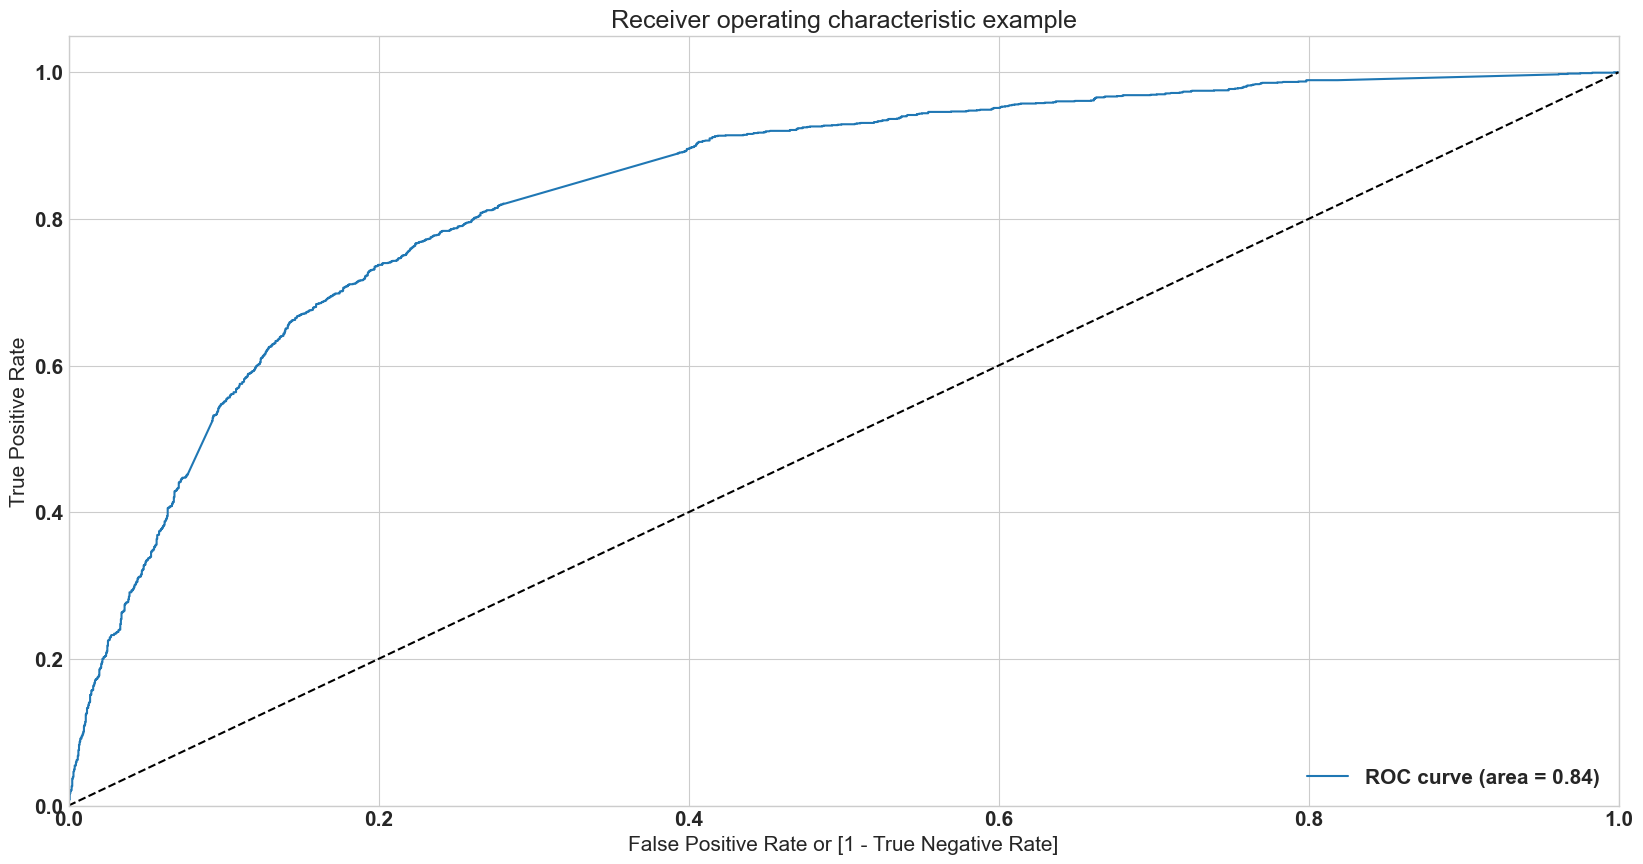

Accuracy 0.7782827074862473
Sensitivity 0.6640625
Specificity 0.8537941994437823
Precision 0.7501697216564833
Recall 0.6640625
F1 Score 0.704494740197641
[[2149  368]
 [ 559 1105]]


In [53]:
#remove Lead Origin_Landing Page Submission
col_8 = col_7.drop('Lead Origin_Landing Page Submission', 1)
#model8
conf_8 = build_model(col_8)
print(conf_8)


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4181
Model:                            GLM   Df Residuals:                     4173
Model Family:                Binomial   Df Model:                            7
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2027.5
Date:                Tue, 03 Jan 2023   Deviance:                       4054.9
Time:                        20:31:38   Pearson chi2:                 4.27e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3124
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

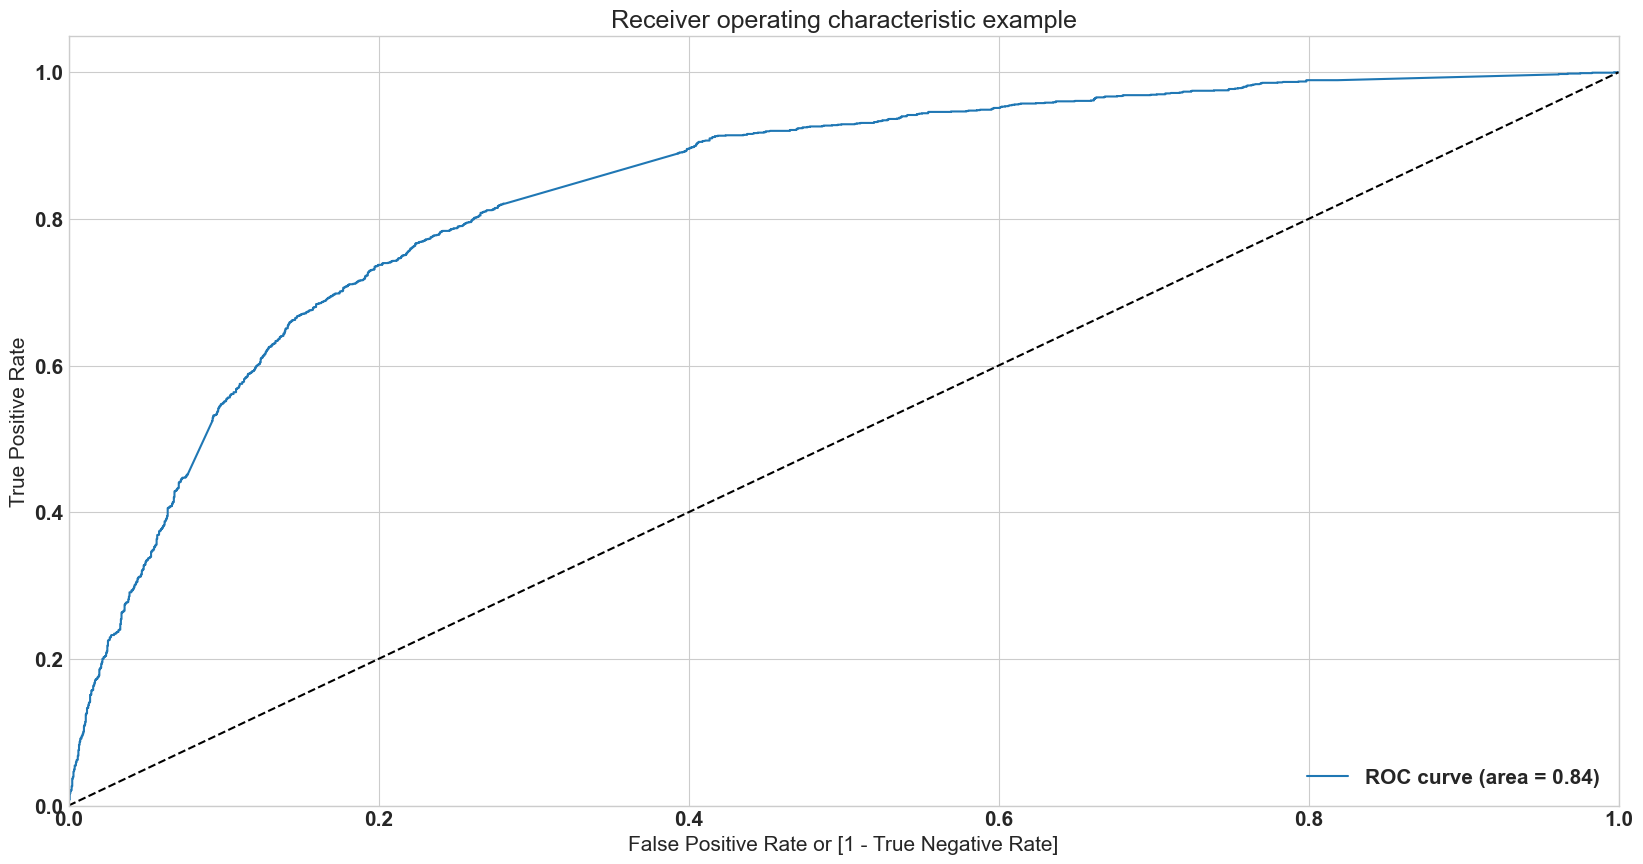

Accuracy 0.7782827074862473
Sensitivity 0.6640625
Specificity 0.8537941994437823
Precision 0.7501697216564833
Recall 0.6640625
F1 Score 0.704494740197641
[[2149  368]
 [ 559 1105]]


In [54]:
# remove Last Notable Activity_Email Marked Spam
col_9 = col_8.drop('Last Notable Activity_Email Marked Spam', 1)
#model9
conf_9 = build_model(col_9)
print(conf_9)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4181
Model:                            GLM   Df Residuals:                     4173
Model Family:                Binomial   Df Model:                            7
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2027.5
Date:                Tue, 03 Jan 2023   Deviance:                       4054.9
Time:                        20:31:39   Pearson chi2:                 4.27e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3124
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

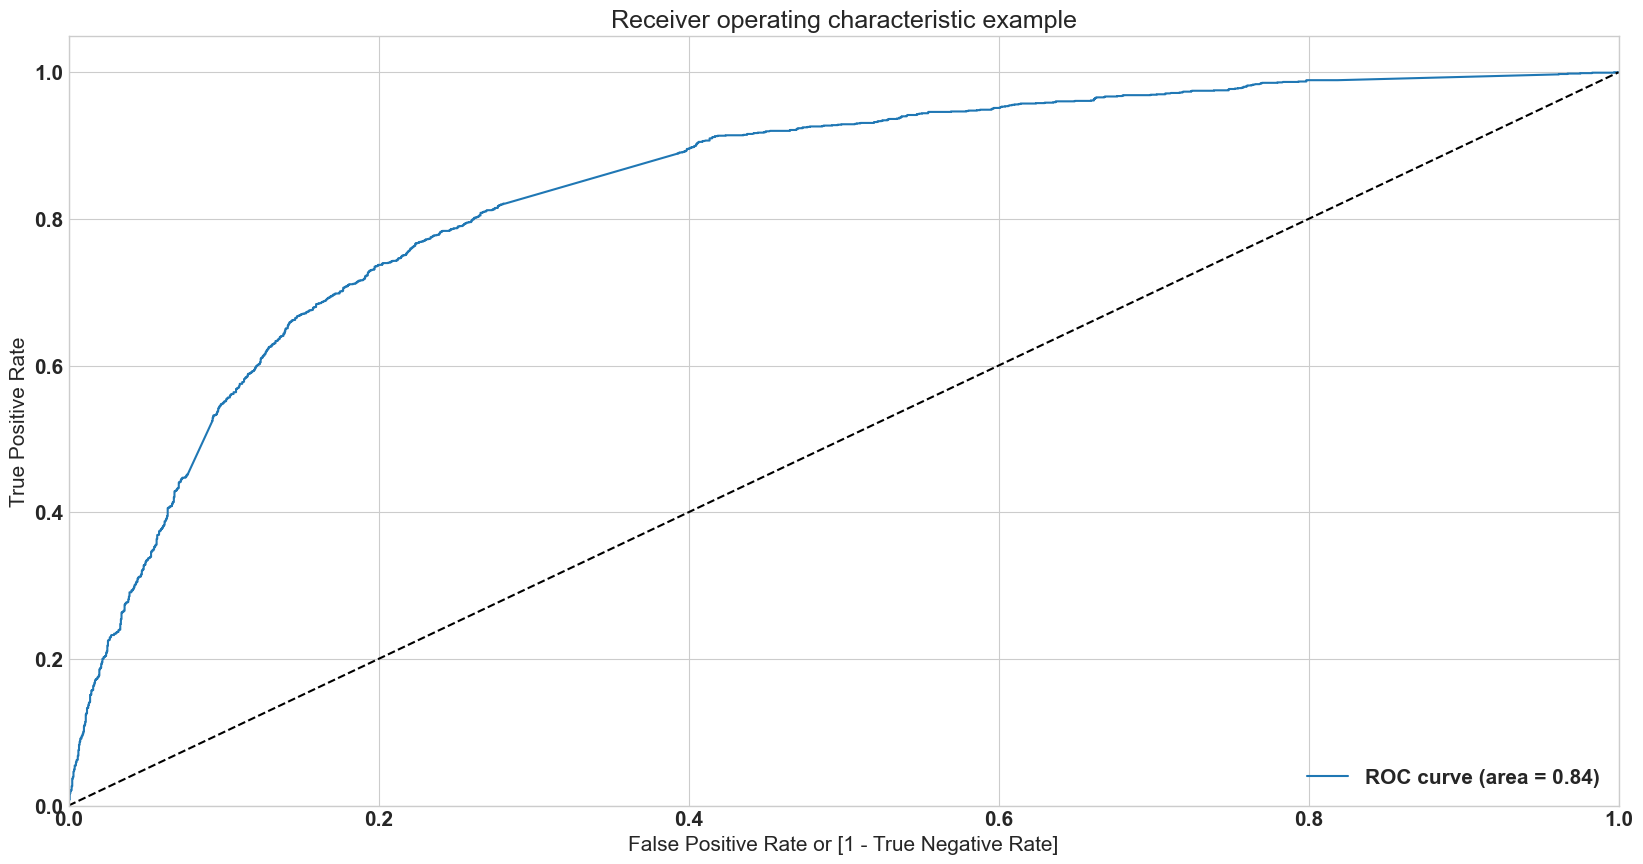

Accuracy 0.7782827074862473
Sensitivity 0.6640625
Specificity 0.8537941994437823
Precision 0.7501697216564833
Recall 0.6640625
F1 Score 0.704494740197641
[[2149  368]
 [ 559 1105]]


In [55]:
#remove Last Activity_Had a Phone Conversation
col_10 = col_9.drop('Last Activity_Had a Phone Conversation', 1)

#model10
conf_10 = build_model(col_10)
print(conf_10)


## Finding Optimal Cutoff Point

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4181
Model:                            GLM   Df Residuals:                     4173
Model Family:                Binomial   Df Model:                            7
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2027.5
Date:                Tue, 03 Jan 2023   Deviance:                       4054.9
Time:                        20:31:39   Pearson chi2:                 4.27e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3124
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

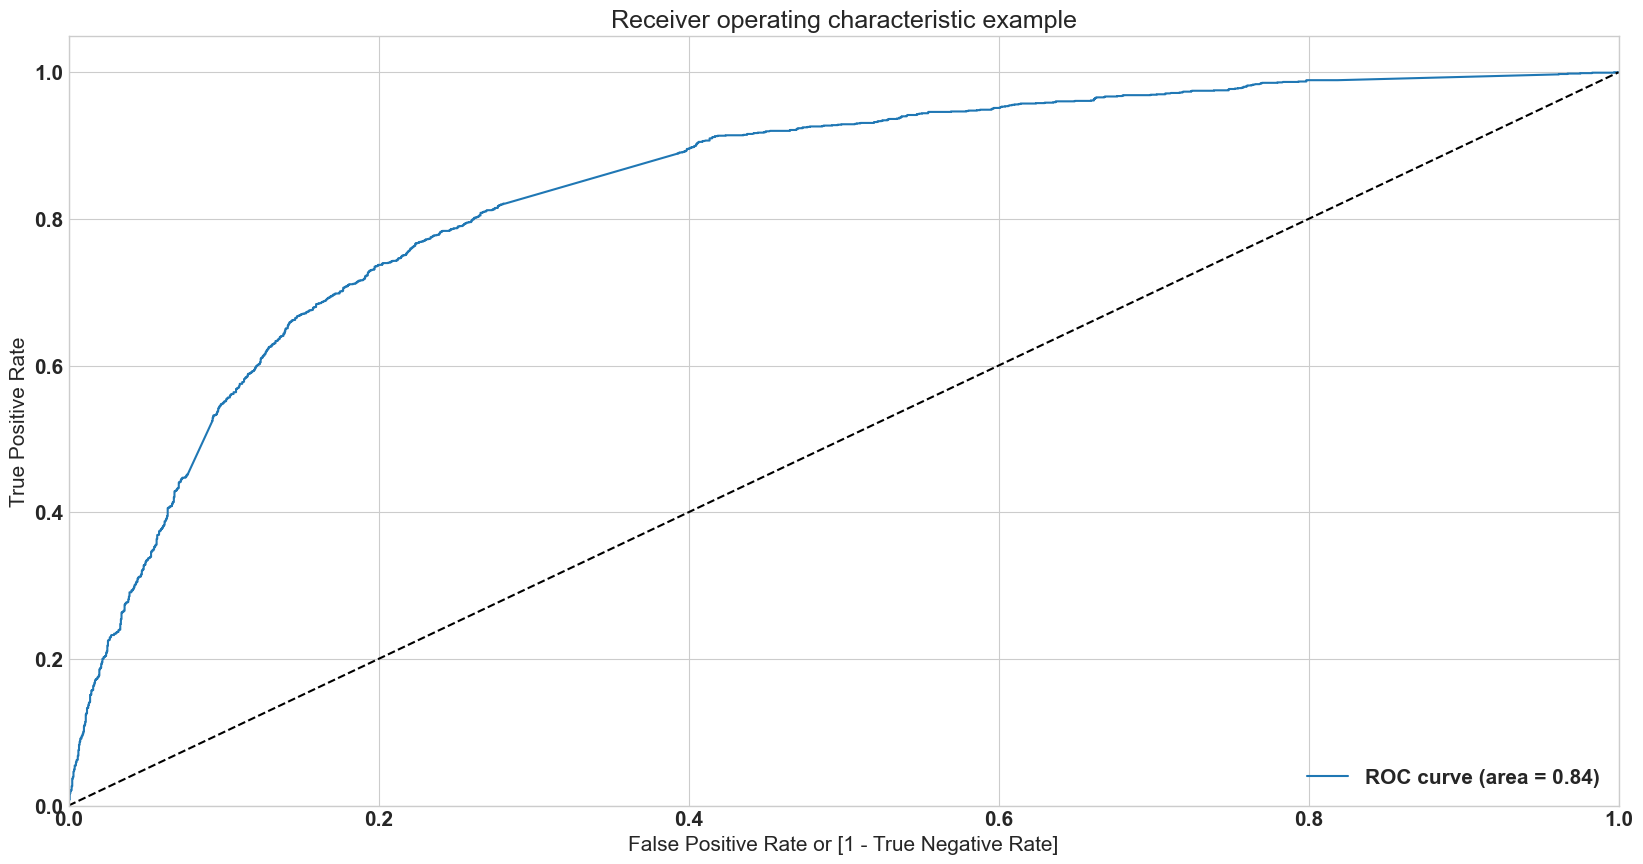

Accuracy 0.7782827074862473
Sensitivity 0.6640625
Specificity 0.8537941994437823
Precision 0.7501697216564833
Recall 0.6640625
F1 Score 0.704494740197641


In [56]:
y_train_pred_final=build_model(col_10)

In [57]:
#stat model buld in col_10
X_train_sm = sm.add_constant(X_train[col_10])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
print(res.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4181
Model:                            GLM   Df Residuals:                     4173
Model Family:                Binomial   Df Model:                            7
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2027.5
Date:                Tue, 03 Jan 2023   Deviance:                       4054.9
Time:                        20:31:40   Pearson chi2:                 4.27e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3124
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [58]:
#predict
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head()


,Converted,Converted_Prob,Lead Number
0,0,0.289405,1621
1,0,0.583484,3313
2,0,0.026067,8444
3,0,0.362886,8003
4,1,0.882825,5783


## Finding Optimal Cutoff Point

In [59]:
# Finding Optimal Cutoff Point
number=[float(x)/10 for x in range(10)]
for i in number:
    y_train_pred_final[i]=y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()


,Converted,Converted_Prob,Lead Number,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.289405,1621,1,1,1,0,0,0,0,0,0,0
1,0,0.583484,3313,1,1,1,1,1,1,0,0,0,0
2,0,0.026067,8444,1,0,0,0,0,0,0,0,0,0
3,0,0.362886,8003,1,1,1,1,0,0,0,0,0,0
4,1,0.882825,5783,1,1,1,1,1,1,1,1,1,0


     prob  accuracy     sensi     speci
0.0   0.0  0.397991  1.000000  0.000000
0.1   0.1  0.535757  0.978966  0.242749
0.2   0.2  0.686199  0.922476  0.529996
0.3   0.3  0.760344  0.814904  0.724275
0.4   0.4  0.771586  0.740986  0.791816
0.5   0.5  0.778283  0.664062  0.853794
0.6   0.6  0.762736  0.569712  0.890346
0.7   0.7  0.722554  0.399639  0.936035
0.8   0.8  0.690983  0.282452  0.961065
0.9   0.9  0.645061  0.125601  0.988478


<AxesSubplot:xlabel='prob'>

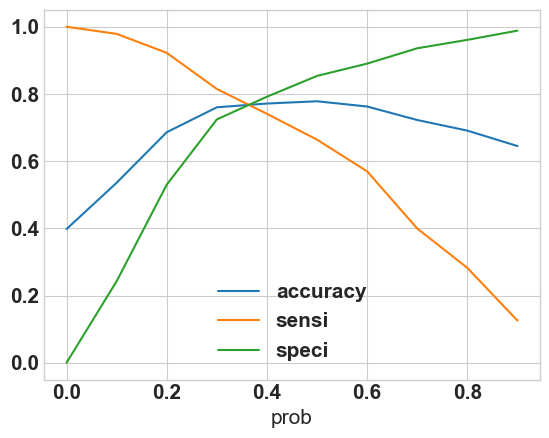

In [60]:
#  calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
num_col = [float(x)/10 for x in range(10)]
for i in num_col:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)
#plot
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])

In [61]:
#From the curve above, 0.42 is the optimum point to take it as a cutoff probability.
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.42 else 0)
y_train_pred_final.head()



,Converted,Converted_Prob,Lead Number,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.289405,1621,1,1,1,0,0,0,0,0,0,0,0
1,0,0.583484,3313,1,1,1,1,1,1,0,0,0,0,1
2,0,0.026067,8444,1,0,0,0,0,0,0,0,0,0,0
3,0,0.362886,8003,1,1,1,1,0,0,0,0,0,0,0
4,1,0.882825,5783,1,1,1,1,1,1,1,1,1,0,1


In [62]:
#confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[2030,  487],
       [ 453, 1211]], dtype=int64)

In [63]:
# true positive true negative false positive false negative
TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives


print(f"sensitivity: {round(TP / float(TP+FN),2)*100 }%")
print(f"specificity: {round(TN / float(TN+FP),2)*100 }%")

print(f"precision: {round(TP / float(TP+FP),2)*100 }%")
print(f"recall: {round(TP / float(TP+FN),2)*100 }%")

print(f"f1 score: {round(2*TP / float(2*TP+FP+FN),2)*100 }%")





sensitivity: 73.0%
specificity: 81.0%
precision: 71.0%
recall: 73.0%
f1 score: 72.0%


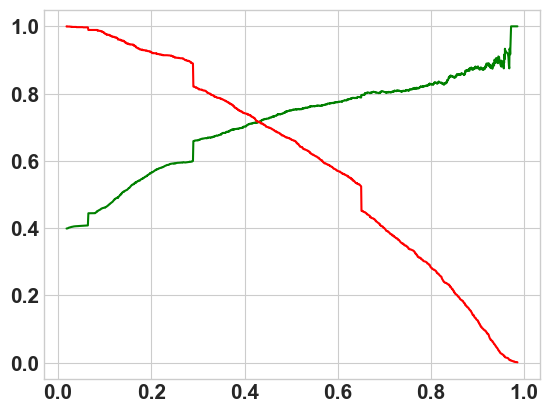

In [64]:
#Precision and recall tradeoff
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Making predictions on the test set

In [65]:
#Making predictions on the test set
X_test[col_10].head()
X_test_sm = sm.add_constant(X_test[col_10])
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]
# Converting y_pred to a dataframe which is an array

y_pred_1 = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

# Putting Prospect ID to index
y_test_df['Lead Number'] = y_test_df.index

# Removing index for both dataframes to append them side by side
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

# Let's see the head of y_pred_final
y_pred_final["final_predicted"] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.3 else 0)
y_pred_final.head()





,Converted,Lead Number,Converted_Prob,final_predicted
0,0,6955,0.119575,0
1,0,2294,0.031998,0
2,1,2956,0.662108,1
3,1,5633,0.650293,1
4,0,3124,0.454039,1


In [66]:
## Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)
#check confusion matrix




0.76171875

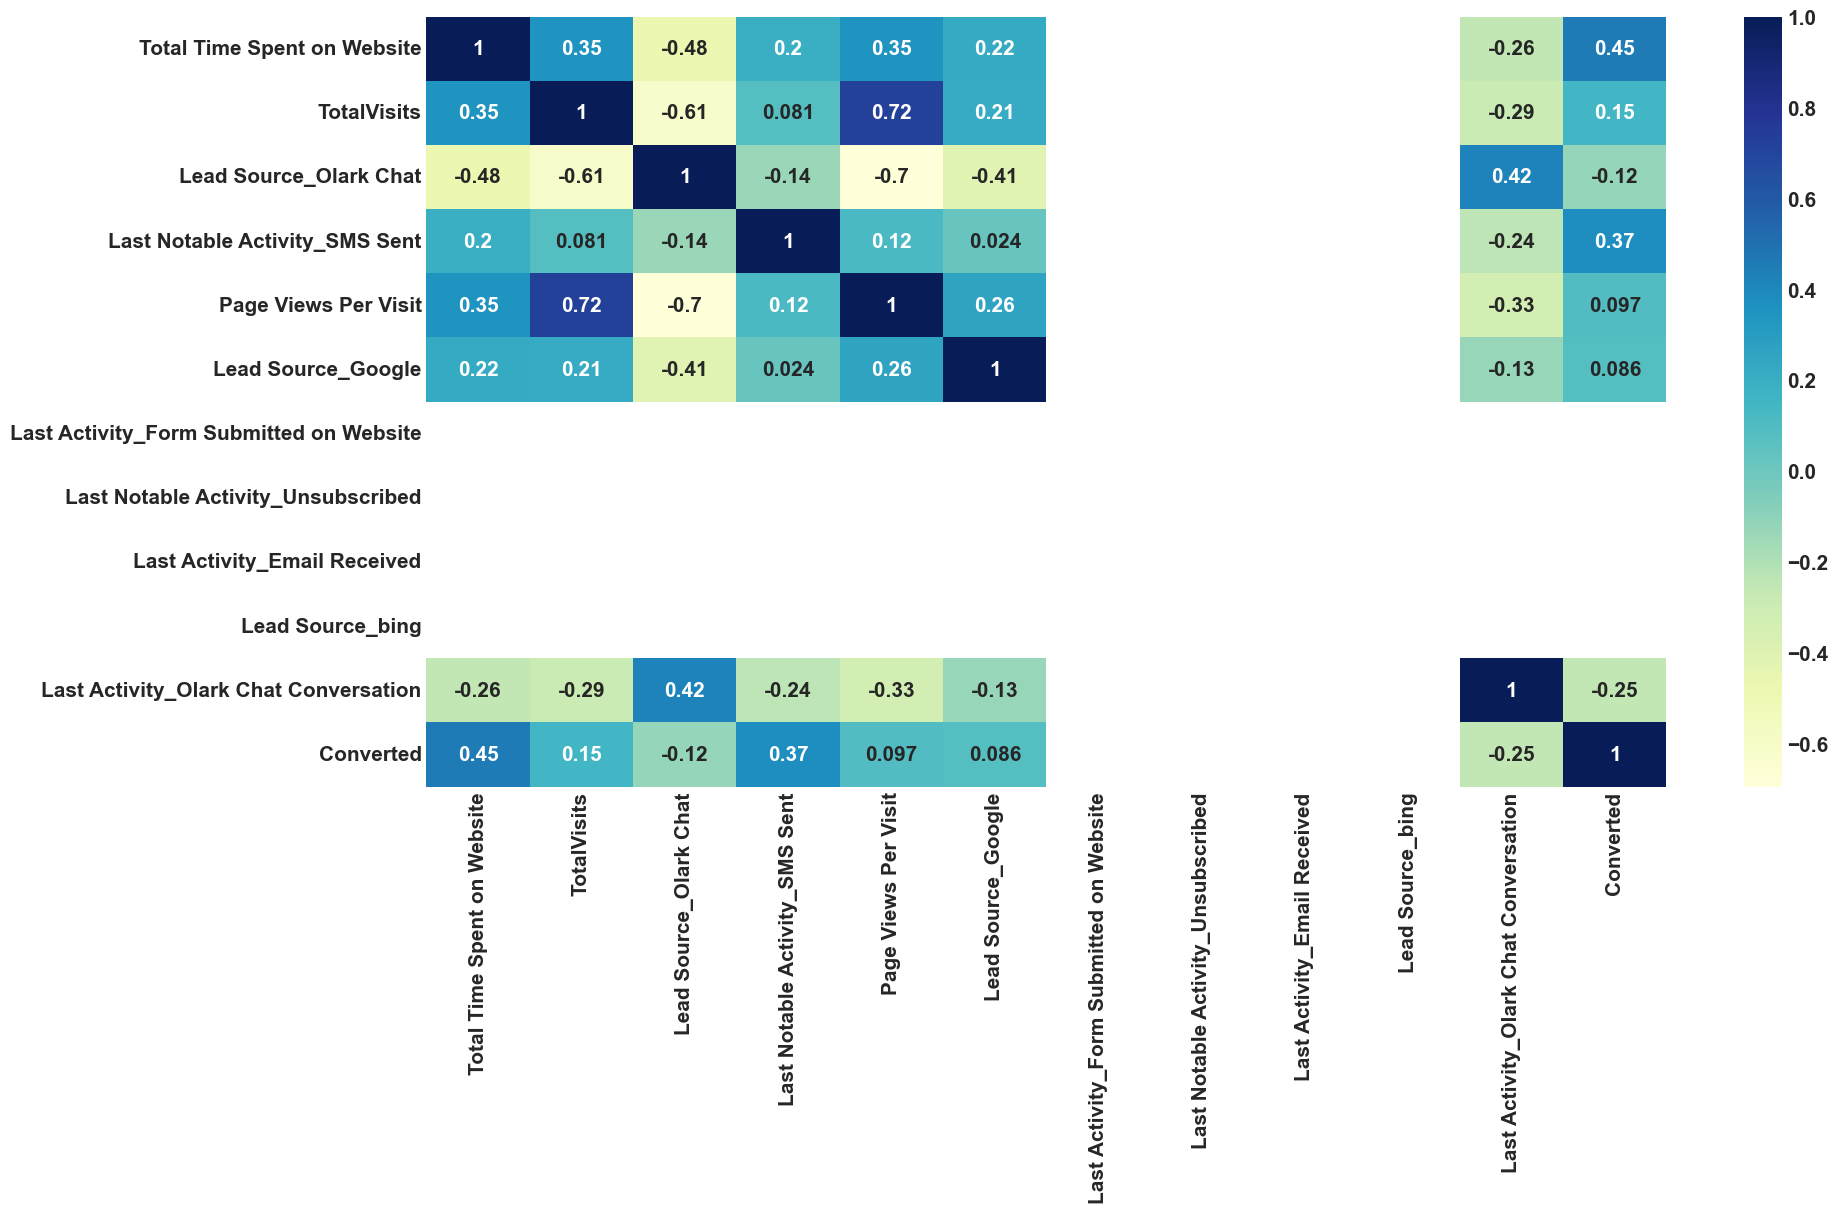

In [67]:
#check the correlation matrix
col_3 = col_10.append(pd.Index(['Converted']))
# col_10 columns in dataframe x_edu_df
x_edu_df_final = x_edu_df[col_3]

#corelation matrix
corr = x_edu_df_final.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(corr, annot = True,cmap="YlGnBu")
plt.show()


# Summary

* **Final Model Summary**:
  * **Accuracy** : 76%
  * **Other stats are mentioned As**
  sensitivity: 73.0%
specificity: 81.0%
precision: 71.0%
recall: 73.0%
f1 score: 72.0%


* **Top 3 Indicators are**
  * Total Time Spent on Website
  * Last Activity_Olark Chat Conversation
  * Last Notable Activity_SMS Sent 